This script contains TFI graphs for Seo,B.(2024), 'Econometric Forecasting Using Ubiquitous News Texts: Text-enhanced Factor Model' International Journal of Forecasting

-Last Update: 2024-11-24 <br>
-Author: Beomseok Seo (bsseo@sookmyung.ac.kr)

## 0. <font color=purple> Environment Setup

In [5]:
import os, copy
from os import walk
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt

## 1. <font color=purple> Data load

In [260]:
ts_dat = pd.read_csv('./data/tfis.csv', index_col=0)

In [261]:
ts_nsi_epu = pd.read_csv('./data/tfi_nsi_epu.csv', index_col=0)

In [262]:
ts_nsi_epu.columns = ['News Sentiment Index(left)','Economic Policy Uncertainty(left)']

In [263]:
ts_dat = pd.concat([ts_dat,ts_nsi_epu], axis=1)

In [264]:
ts_dat

Production (left)  Shipbuilding (left)  Automotive (left)  \
200501           0.011862             0.000588           0.007335   
200502           0.015820             0.000365           0.006683   
200503           0.015392             0.000513           0.003453   
200504           0.013760             0.000502           0.003407   
200505           0.014282             0.000423           0.004655   
...                   ...                  ...                ...   
202308           0.012365             0.000306           0.005415   
202309           0.011676             0.000533           0.004654   
202310           0.011137             0.000262           0.003893   
202311           0.010306             0.000155           0.004587   
202312           0.009884             0.000265           0.006478   

        Semiconductor (left)  Capital Investment (left)  \
200501              0.003156                   0.009185   
200502              0.007440                   0.006291   
200503              0.000572                   0.006295   
200504              0.000131                   0.004696   
200505              0.005015                   0.004443   
...                      ...                        ...   
202308              0.002724                   0.004150   
202309              0.002937                   0.003443   
202310              0.004908                   0.004511   
202311              0.007121                   0.003727   
202312              0.011921                   0.004262   

        House Construction (left)  Unemployment (left)  Recruitment (left)  \
200501                   0.030777             0.002438            0.004331   
200502                   0.036287             0.000574            0.005378   
200503                   0.036249             0.001283            0.007222   
200504                   0.045583            -0.000240            0.003844   
200505                   0.042804             0.001100            0.005247   
...                           ...                  ...                 ...   
202308                   0.042875             0.000008            0.008453   
202309                   0.035472             0.000615            0.008920   
202310                   0.034418             0.000102            0.007794   
202311                   0.030090             0.001348            0.007780   
202312                   0.036970             0.001635            0.008275   

        Job Search (left)  Wholesale and Retail (left)  \
200501           0.001175                     0.001502   
200502           0.000809                     0.000548   
200503           0.001421                     0.001796   
200504           0.001245                     0.001791   
200505           0.001185                     0.003936   
...                   ...                          ...   
202308           0.002164                     0.002665   
202309           0.001265                     0.002115   
202310           0.001329                     0.002522   
202311           0.002317                     0.000488   
202312           0.002259                     0.000513   

        Government Expenditure (left)  Price Outlook (left)  \
200501                       0.022789              0.000784   
200502                       0.018091              0.001697   
200503                       0.020621              0.001736   
200504                       0.017124              0.003014   
200505                       0.021286              0.001925   
...                               ...                   ...   
202308                       0.041865              0.006705   
202309                       0.052128              0.006923   
202310                       0.038497              0.006762   
202311                       0.037955              0.005905   
202312                       0.045674              0.004638   

        Stock Price Outlook (left)  House Price Outlook (left)  \
200501       

---

In [410]:
stat_dat = pd.DataFrame(index=ts_dat.index)

In [411]:
# soure: https://kosis.kr/openapi/ table: DT_1C8015 | item: T1 
df_kosis = pd.read_csv('./data/SI_month_production_20050101_20240801.csv', index_col=0)
stat_dat['Cyclical Component of Leading Index (right)'] = df_kosis

In [412]:
# source: Clarksons
df_csv = pd.read_csv('./data/SI_month_shipbuilding_20050101_20240201.csv', index_col=0)
stat_dat['Ship Orders in CGT (right)'] = df_csv

In [413]:
# source: Korea Automobile Association
df_csv = pd.read_csv('./data/SI_month_automobile_20050101_20240201.csv', index_col=0)
stat_dat['Car Sales YoY (right)'] = df_csv

In [414]:
# soure: https://kosis.kr/openapi/ table: DT_092_115_2009_S023 | item: 13103131003T1 
df_csv = pd.read_csv('./data/SI_month_semiconductor_20050101_20240801.csv', index_col=0)
stat_dat['Semiconductor Export YoY (right)'] = df_csv

In [415]:
# soure: https://kosis.kr/openapi/ table: DT_1F70011 | item: T3 
df_kosis = pd.read_csv('./data/SI_month_facility-investment_20050101_20240801.csv', index_col=0)
stat_dat['Capital Investment Index YoY (right)'] = df_kosis

In [416]:
# soure: https://kosis.kr/openapi/ table: DT_MLTM_5386 | item: 13103766971T1 
df_kosis = pd.read_csv('./data/SI_month_construction_20050101_20240801.csv', index_col=0)
stat_dat['Housing Construction (right)'] = df_kosis

In [417]:
# soure: https://kosis.kr/openapi/ table: INH_1DA7104S | item: T80 
df_kosis = pd.read_csv('./data/SI_month_unemployment_20050101_20240801.csv', index_col=0)
stat_dat['Unemployment Rate YoY (right)'] = df_kosis

In [418]:
# soure: https://kosis.kr/openapi/ table: INH_1DA7014S_03 | item: T90
df_kosis = pd.read_csv('./data/SI_month_recruitment_20050101_20240801.csv', index_col=0)
stat_dat['Employment to Population Ratio YoY (right)'] = df_kosis

In [419]:
# soure: https://kosis.kr/openapi/ table: INH_1DA7030S | item: T30
df_kosis = pd.read_csv('./data/SI_month_job-seeking_20050101_20240801.csv', index_col=0)
stat_dat['Number of Employed YoY (right)'] = df_kosis

In [420]:
# soure: https://kosis.kr/openapi/ table: DT_1KC2020 | item: T2
df_kosis = pd.read_csv('./data/SI_month_wholesale-retail_20050101_20240801.csv', index_col=0)
stat_dat['Service Industry Survey Wholesale and Retail YoY (right)'] = df_kosis

In [421]:
# soure: https://kosis.kr/openapi/ table: DT_102N_AD01 | item: 16102AD1
df_kosis = pd.read_csv('./data/SI_month_gov-expenditure_20050101_20240801.csv', index_col=0)
stat_dat['Negative Consolidated Fiscal Balance YoY (right)'] = df_kosis

In [422]:
# soure: https://kosis.kr/openapi/ table: DT_1J22003 | item: T
df_kosis = pd.read_csv('./data/SI_month_price_20050101_20240801.csv', index_col=0)
stat_dat['Consumer Price Index YoY (right)'] = df_kosis

In [423]:
# soure: https://ecos.bok.or.kr/api/ table: 901Y014 | item: 1080000
df_ecos = pd.read_csv('./data/SI_month_stockprice_20050101_20240801.csv', index_col=0)
stat_dat['KOSPI closing price YoY (right)'] = df_ecos

In [424]:
# soure: https://kosis.kr/openapi/ table: DT_40803_N0001 | item: sales
df_kosis = pd.read_csv('./data/SI_month_houseprice_20050101_20240201.csv', index_col=0)
stat_dat['House Price Index MoM (right)'] = df_kosis

In [425]:
# soure: stats.oecd.org table: IMTS-XTIMVA-CXMLSA | item: BRICS+OECD
df_csv = pd.read_csv('./data/SI_month_world-trade_20050101_20240201.csv', index_col=0)
stat_dat['World Trade Volume YoY (right)'] = df_csv

In [426]:
# soure: https://ecos.bok.or.kr/api/ & http://data.krx.co.kr/
df_csv = pd.read_csv('./data/SI_month_esi_vkospi_20050101_20240301.csv', index_col=0)
stat_dat['Economic Sentiment Index(right)'] = df_csv.iloc[:,0]
stat_dat['VKOSPI(right)'] = df_csv.iloc[:,1]

---

#### Time series graph

In [427]:
ts = pd.concat([ts_dat,stat_dat],axis=1)

In [428]:
ts.columns

Index(['Production (left)', 'Shipbuilding (left)', 'Automotive (left)',
       'Semiconductor (left)', 'Capital Investment (left)',
       'House Construction (left)', 'Unemployment (left)',
       'Recruitment (left)', 'Job Search (left)',
       'Wholesale and Retail (left)', 'Government Expenditure (left)',
       'Price Outlook (left)', 'Stock Price Outlook (left)',
       'House Price Outlook (left)', 'World Trade (left)',
       'News Sentiment Index(left)', 'Economic Policy Uncertainty(left)',
       'Cyclical Component of Leading Index (right)',
       'Ship Orders in CGT (right)', 'Car Sales YoY (right)',
       'Semiconductor Export YoY (right)',
       'Capital Investment Index YoY (right)', 'Housing Construction (right)',
       'Unemployment Rate YoY (right)',
       'Employment to Population Ratio YoY (right)',
       'Number of Employed YoY (right)',
       'Service Industry Survey Wholesale and Retail YoY (right)',
       'Negative Consolidated Fiscal Balance YoY (right

In [429]:
ts.index = [str(x) for x in ts.index]

In [430]:
ts = ts.iloc[:,[x for y in zip(range(0,17),range(17,34)) for x in y]]

In [431]:
ts

Production (left)  Cyclical Component of Leading Index (right)  \
200501           0.011862                                         99.4   
200502           0.015820                                         99.6   
200503           0.015392                                        100.1   
200504           0.013760                                        100.1   
200505           0.014282                                         99.8   
...                   ...                                          ...   
202308           0.012365                                         99.5   
202309           0.011676                                         99.6   
202310           0.011137                                         99.9   
202311           0.010306                                        100.1   
202312           0.009884                                        100.3   

        Shipbuilding (left)  Ship Orders in CGT (right)  Automotive (left)  \
200501             0.000588                         NaN           0.007335   
200502             0.000365                         NaN           0.006683   
200503             0.000513                         NaN           0.003453   
200504             0.000502                         NaN           0.003407   
200505             0.000423                         NaN           0.004655   
...                     ...                         ...                ...   
202308             0.000306                        27.0           0.005415   
202309             0.000533                        21.0           0.004654   
202310             0.000262                       165.0           0.003893   
202311             0.000155                        82.0           0.004587   
202312             0.000265                        20.0           0.006478   

        Car Sales YoY (right)  Semiconductor (left)  \
200501              42.533930              0.003156   
200502              -7.740158              0.007440   
200503              11.238216              0.000572   
200504               8.933181              0.000131   
200505               9.532185              0.005015   
...                       ...                   ...   
202308              13.209640              0.002724   
202309              -1.775333              0.002937   
202310               4.463791              0.004908   
202311               9.480995              0.007121   
202312               3.722140              0.011921   

        Semiconductor Export YoY (right)  Capital Investment (left)  \
200501                         28.633124                   0.009185   
200502                         16.361714                   0.006291   
200503                         16.199207                   0.006295   
200504                          5.754538                   0.004696   
200505                          5.891006                   0.004443   
...                                  ...                        ...   
202308                        -21.147942                   0.004150   
202309                        -14.362915                   0.003443   
202310                         -4.694296                   0.004511   
202311                         10.719613                   0.003727   
202312                         19.262732                   0.004262   

        Capital Investment Index YoY (right)  ...  Stock Price Outlook (left)  \
200501                             17.872340  ...                    0.009664   
200502                             -6.071429  ...                    0.012766   
200503                             -0.791139  ...                    0.007696   
200504                              0.000000  ...                    0.005875   
200505                              5.477032  ...                    0.006813   
...                                      ...  ...                         ...   
202308                            -14.273128  ...                    0.003098   
202309              

In [432]:
labels = ts.columns

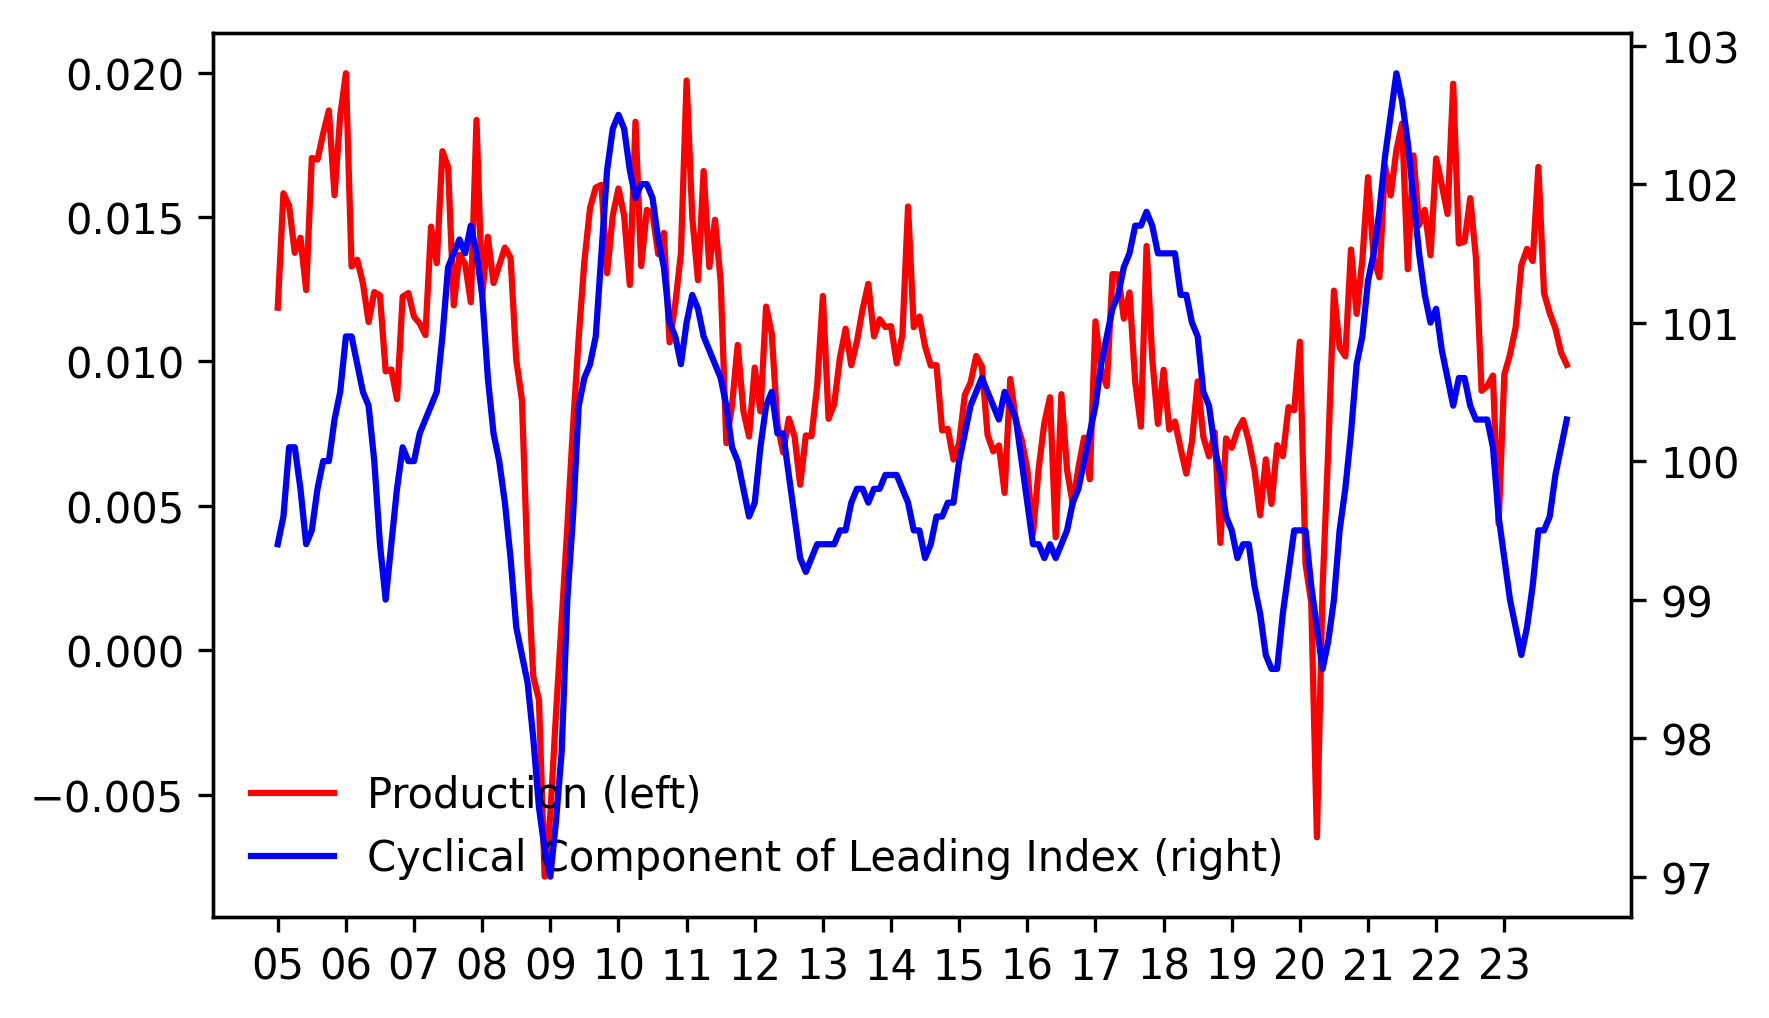

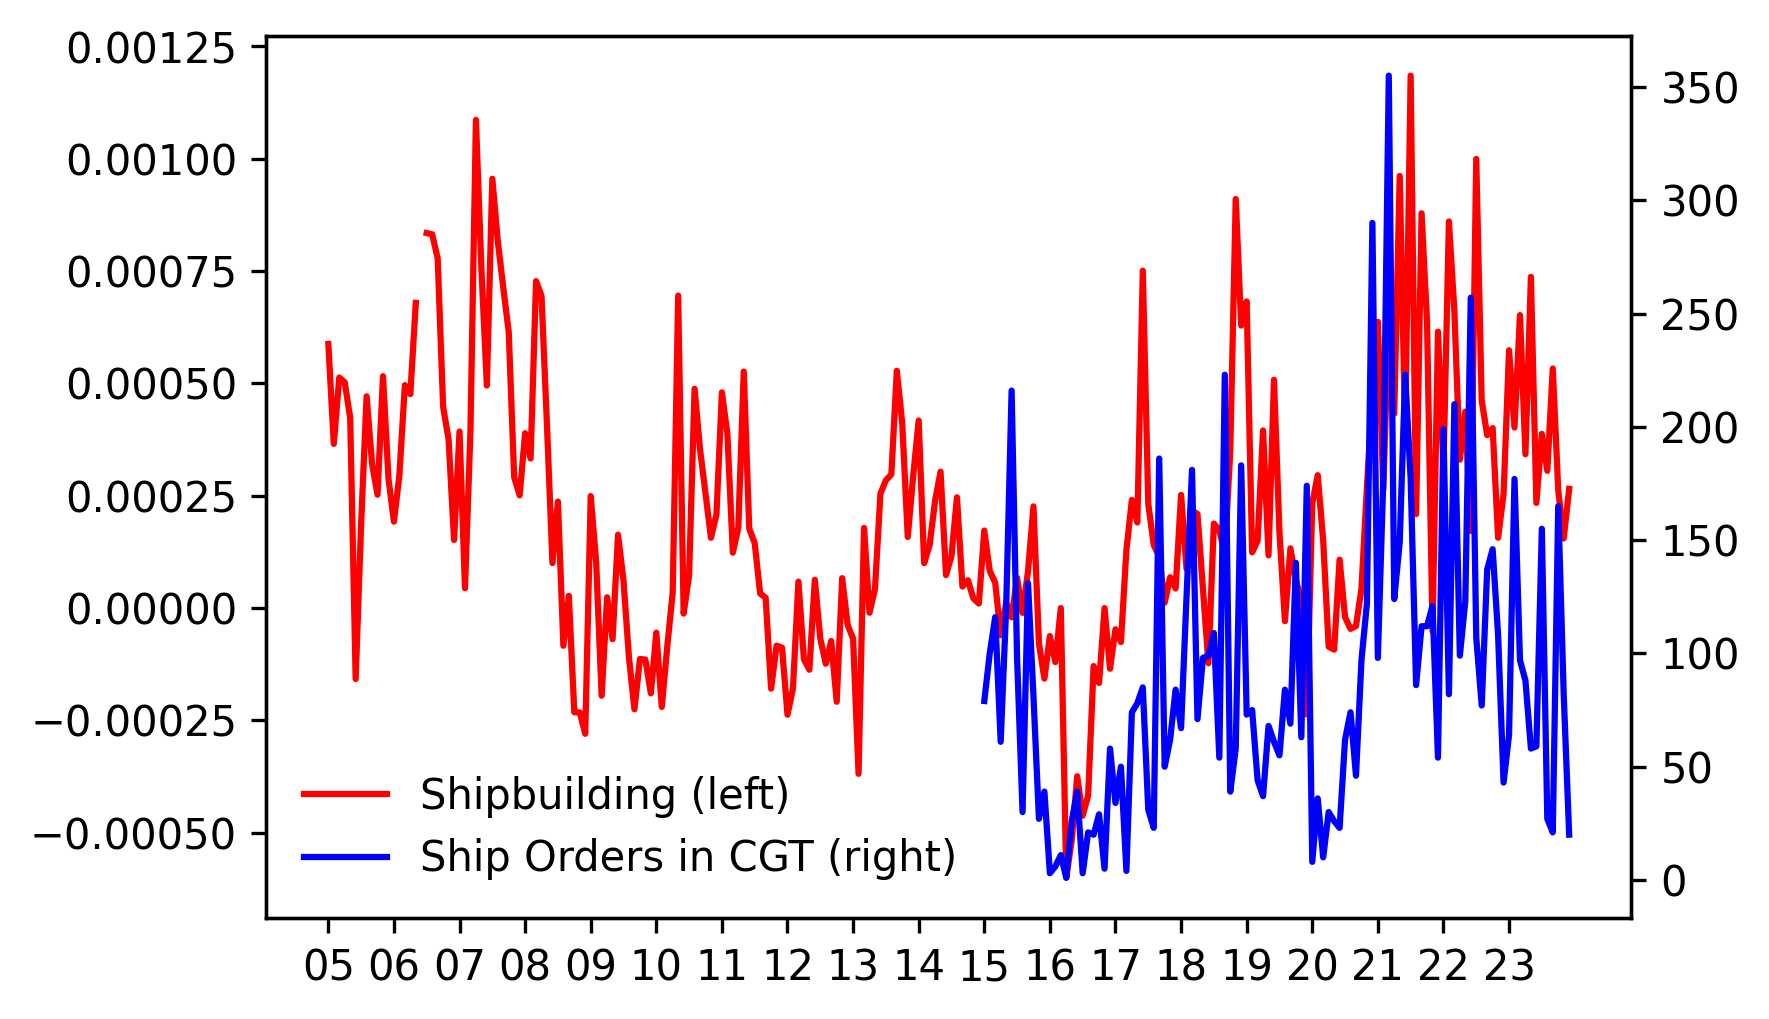

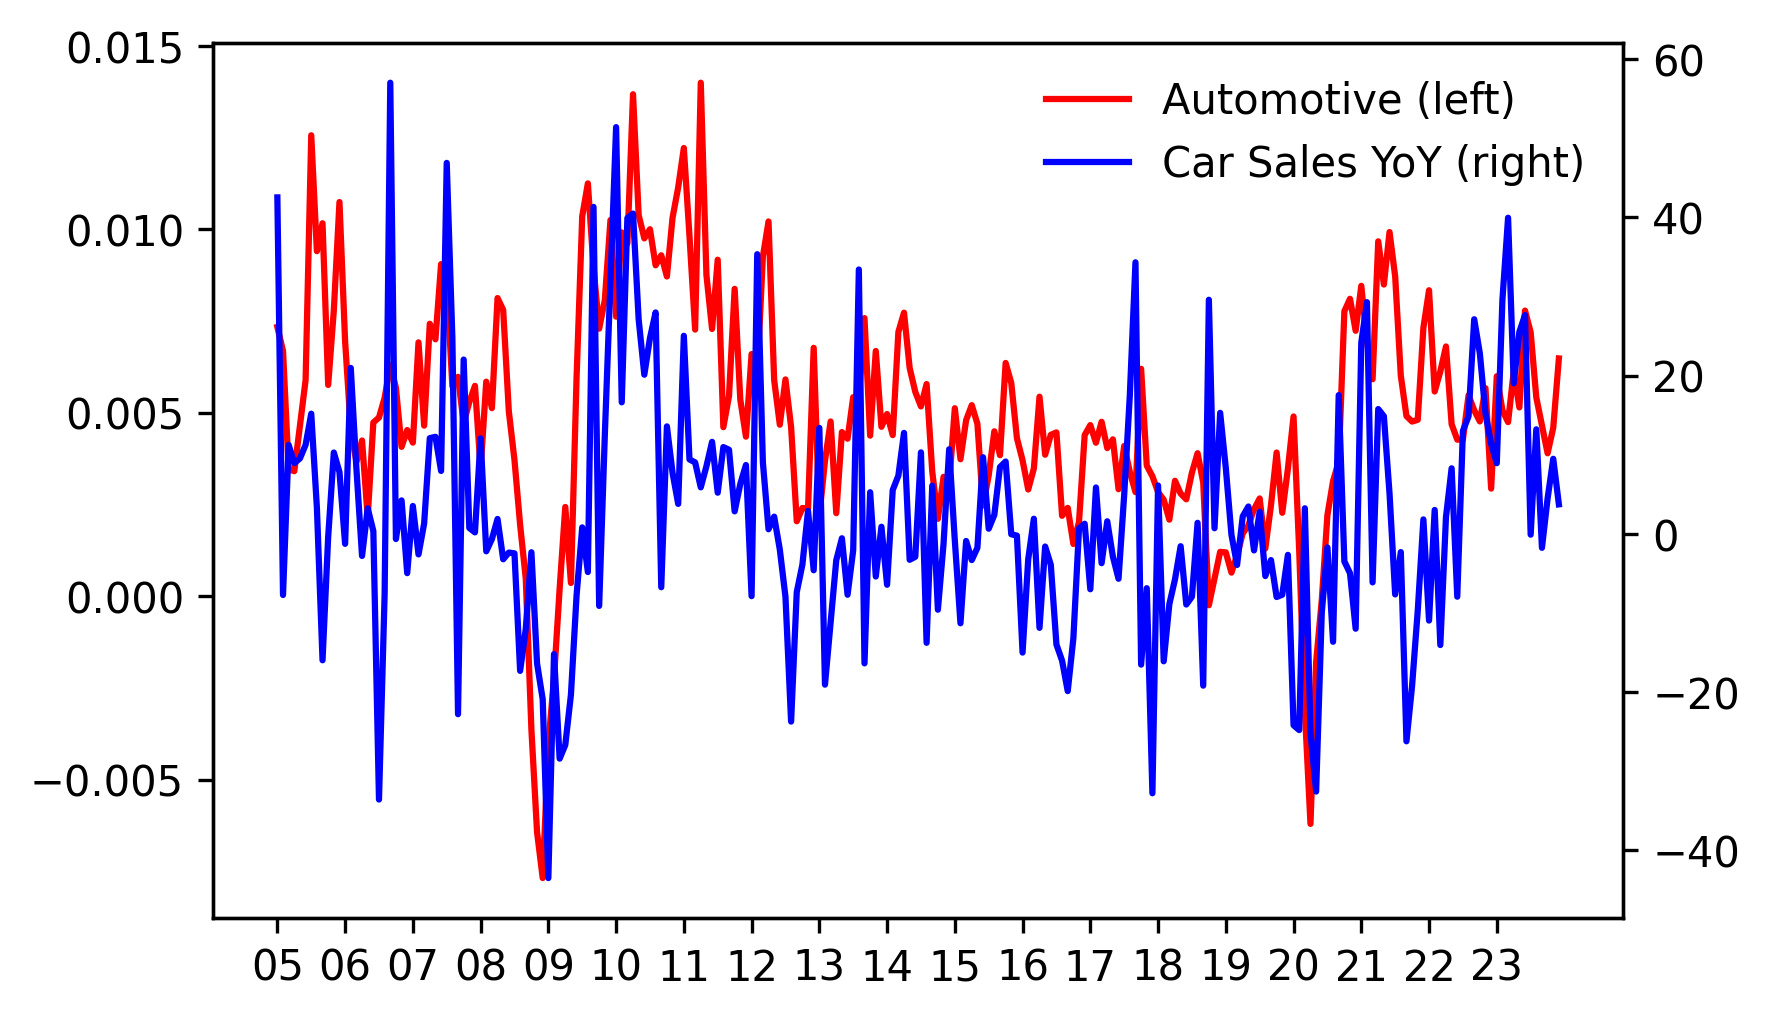

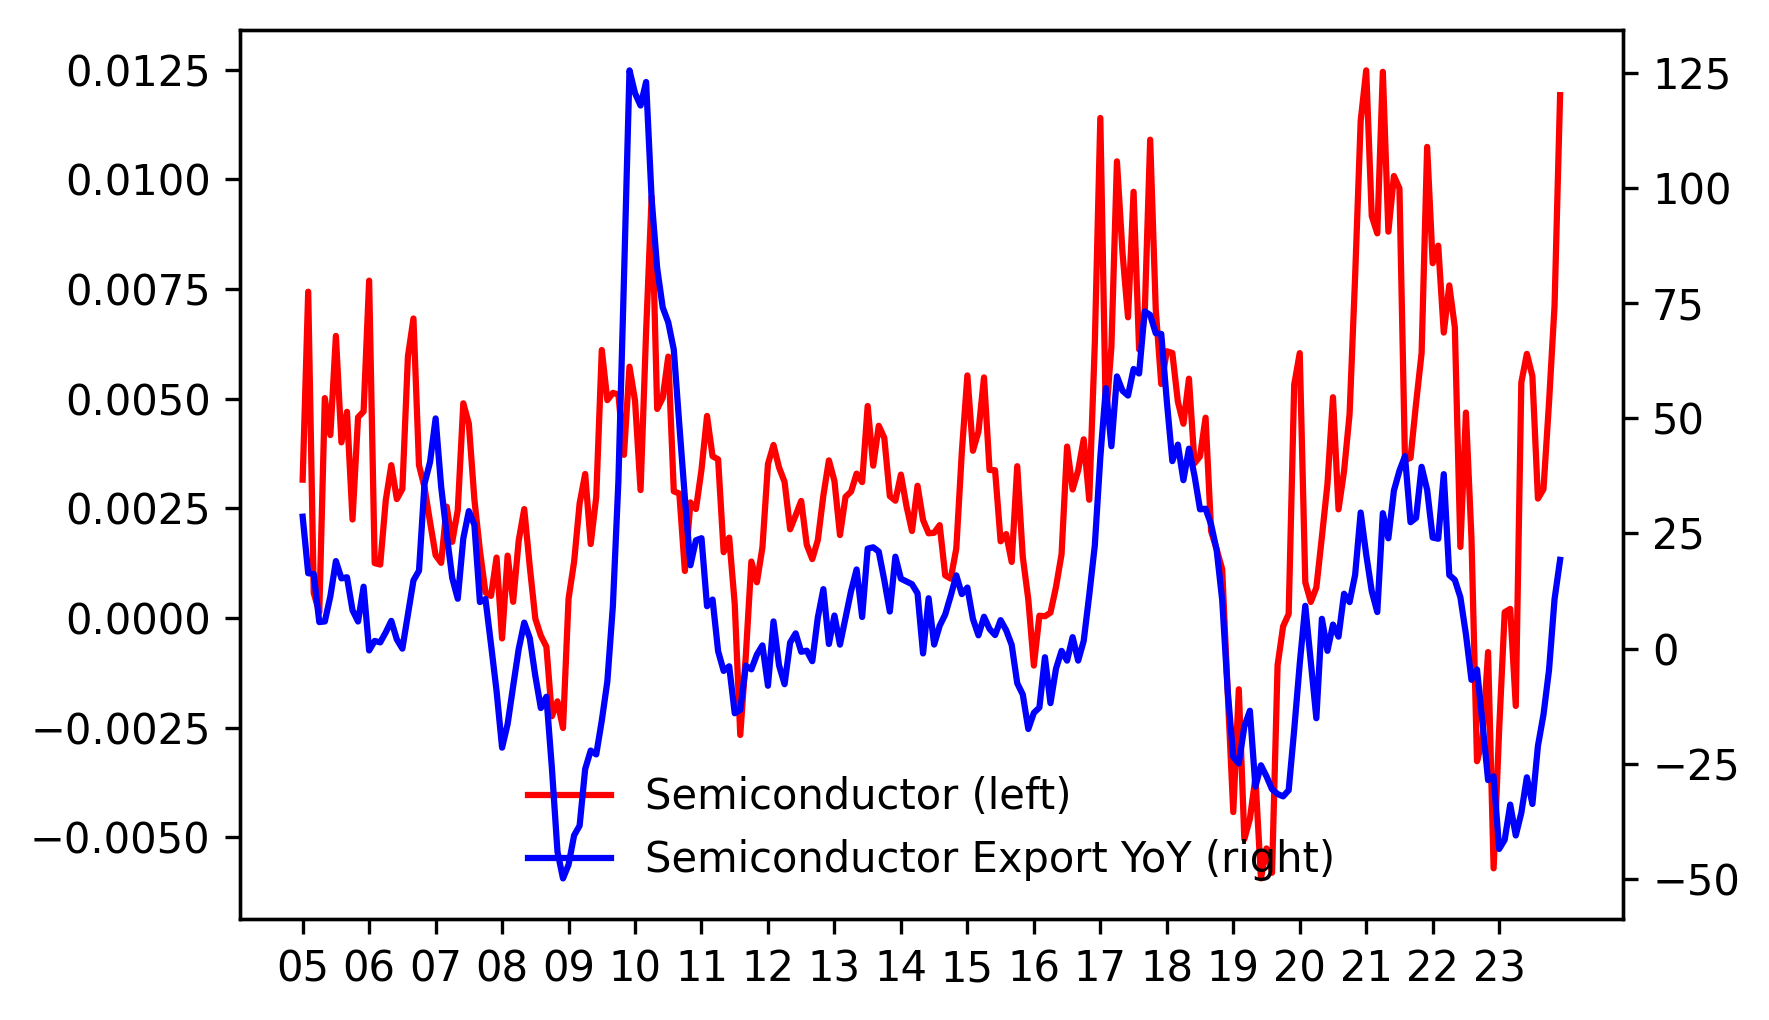

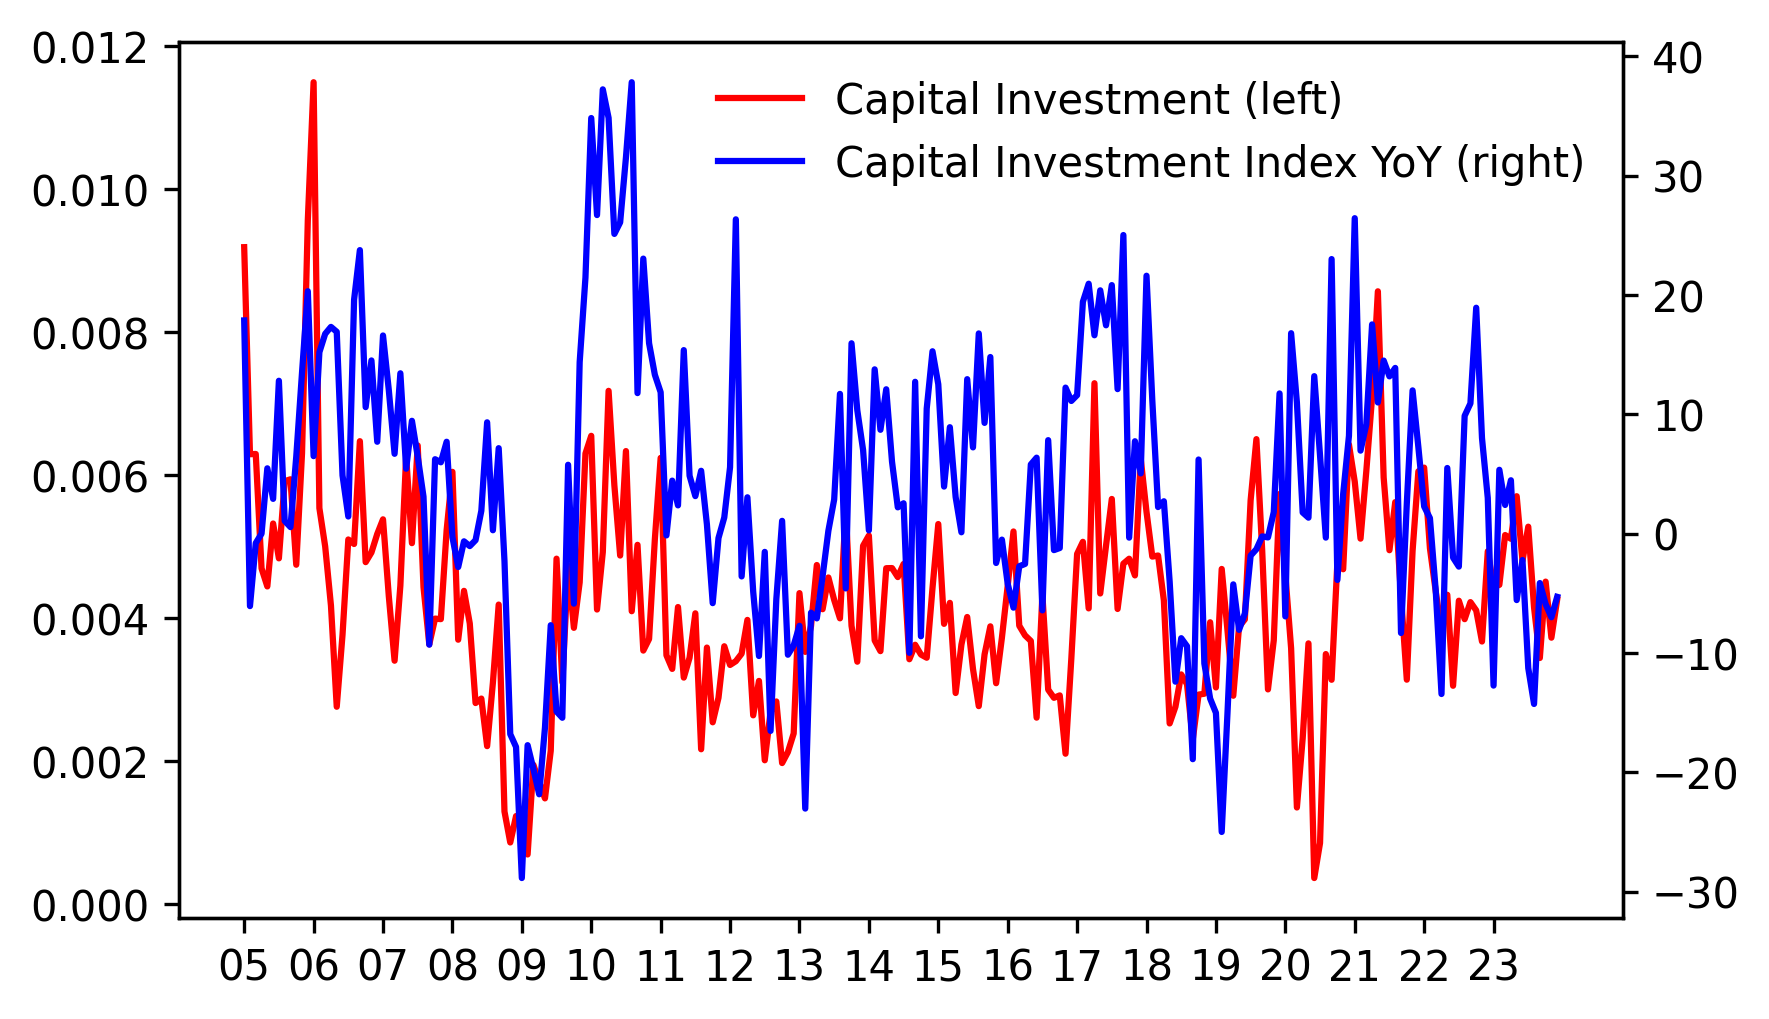

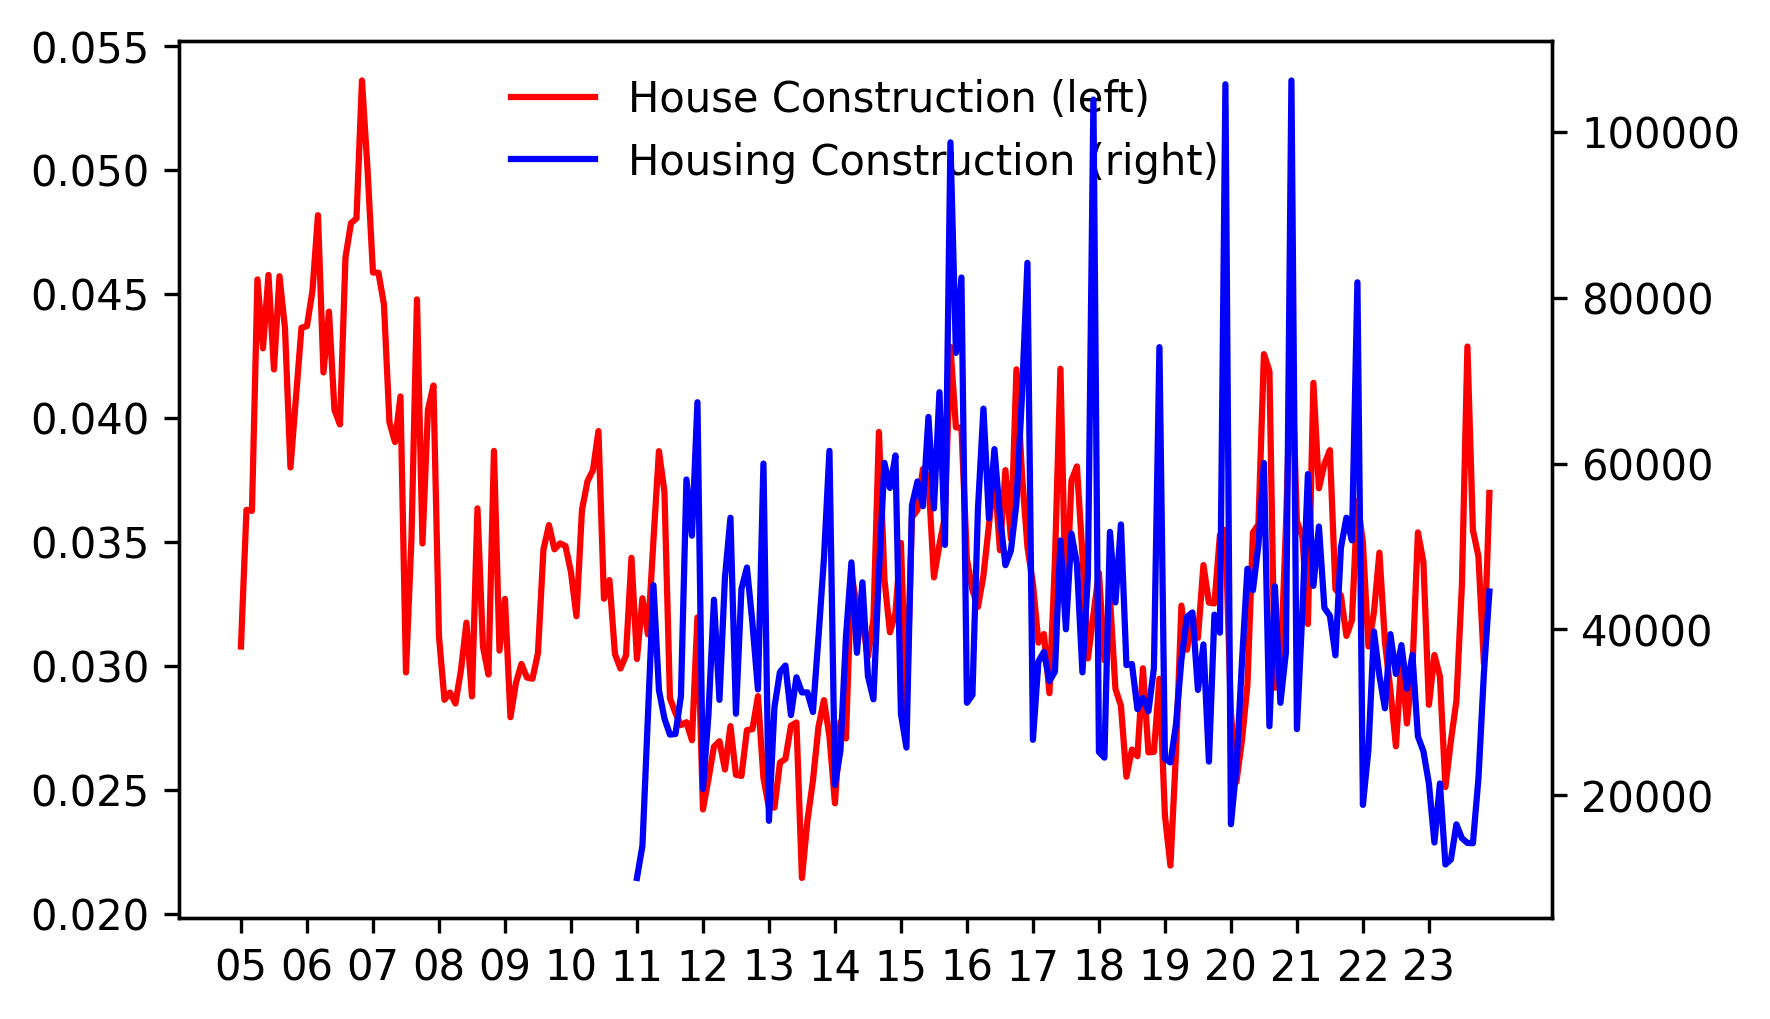

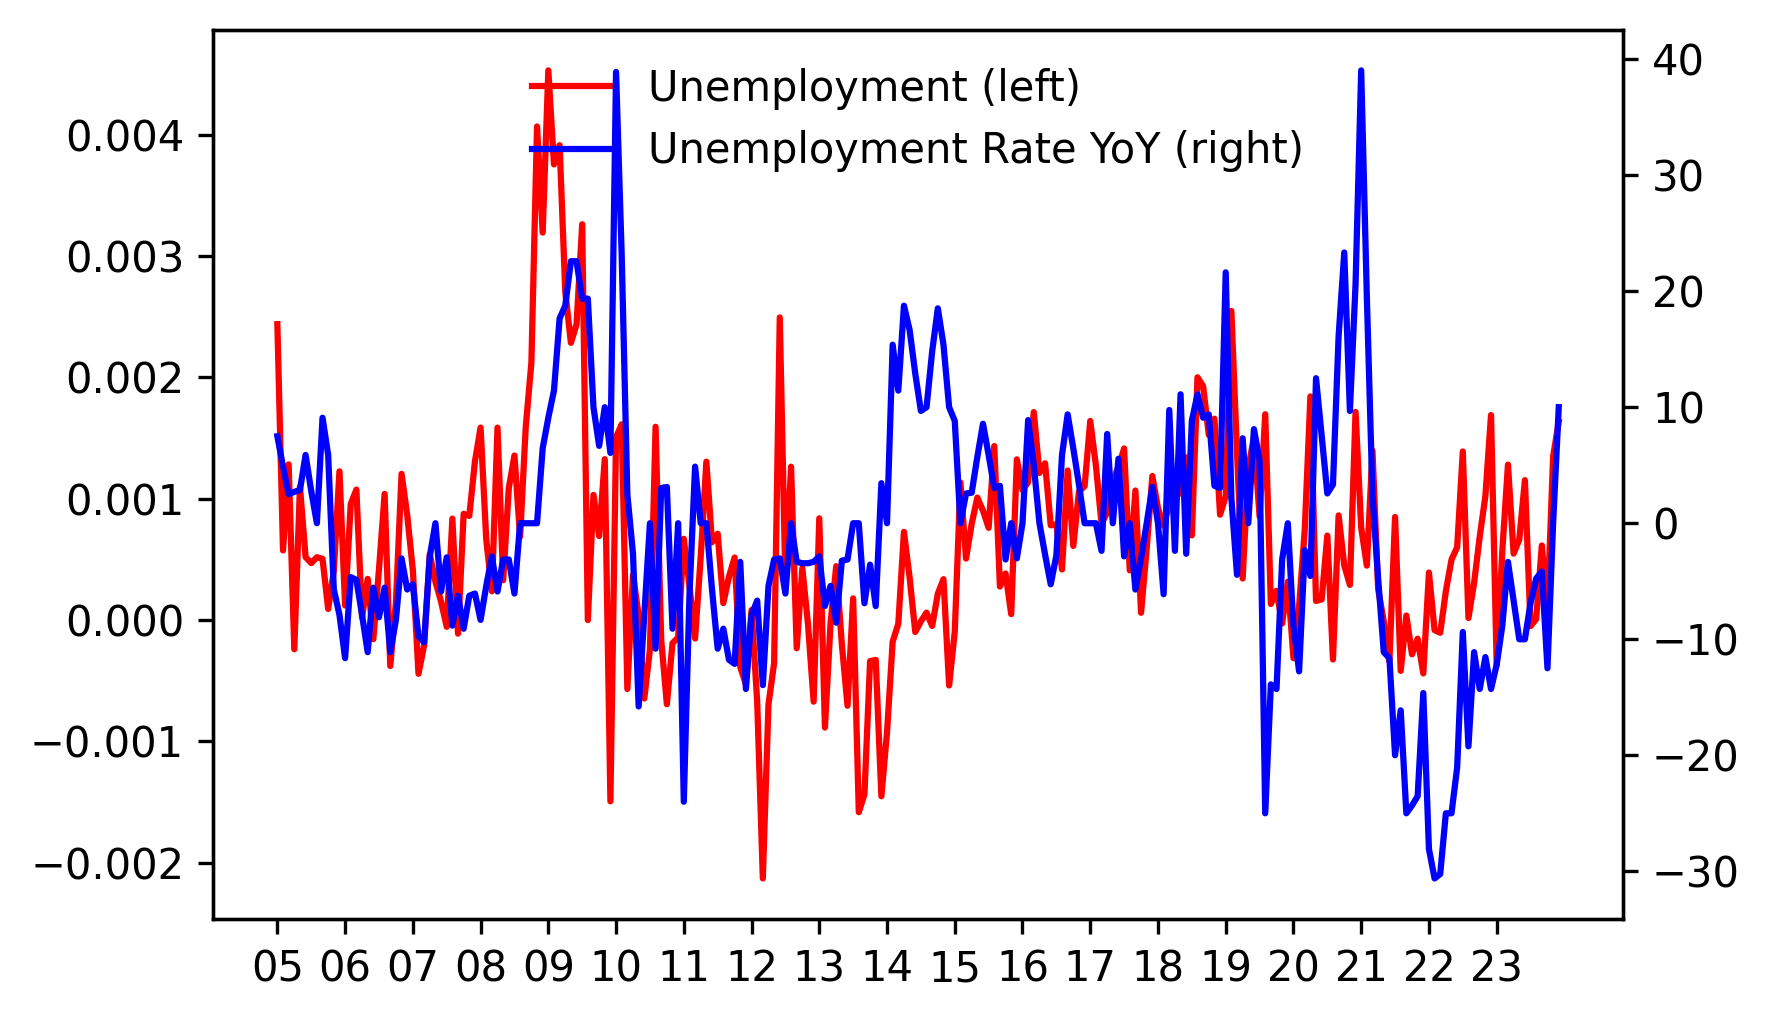

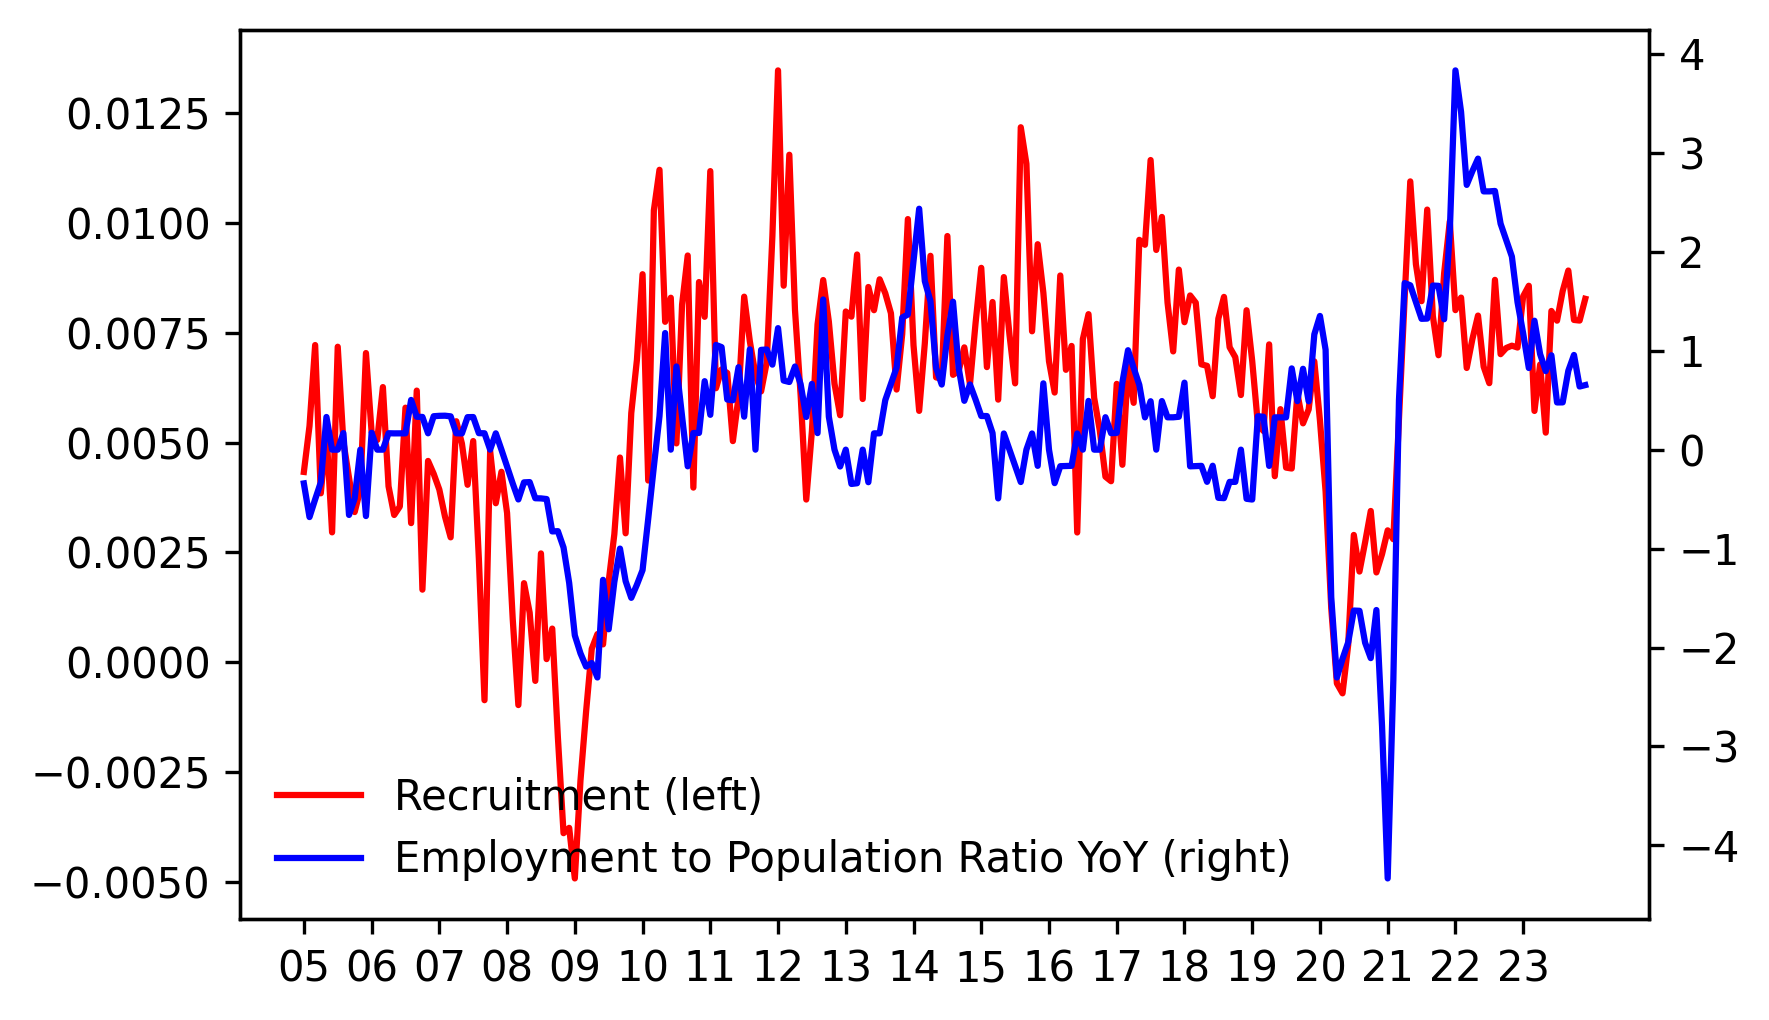

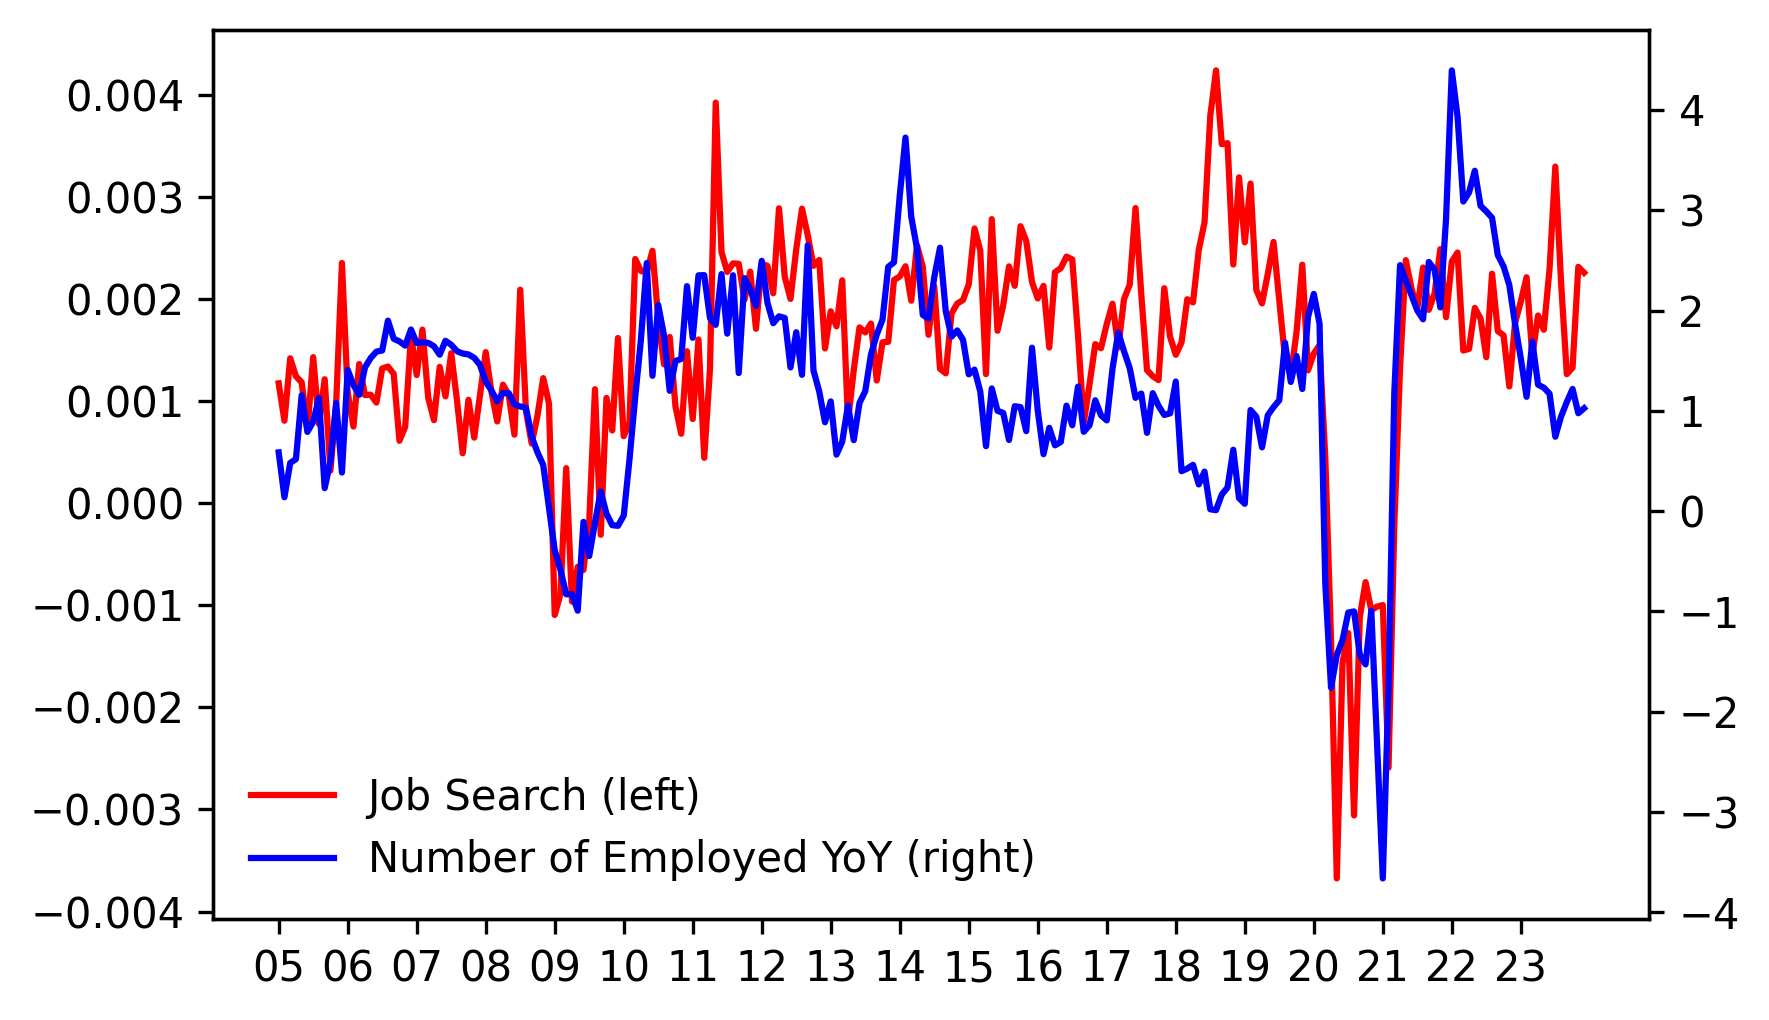

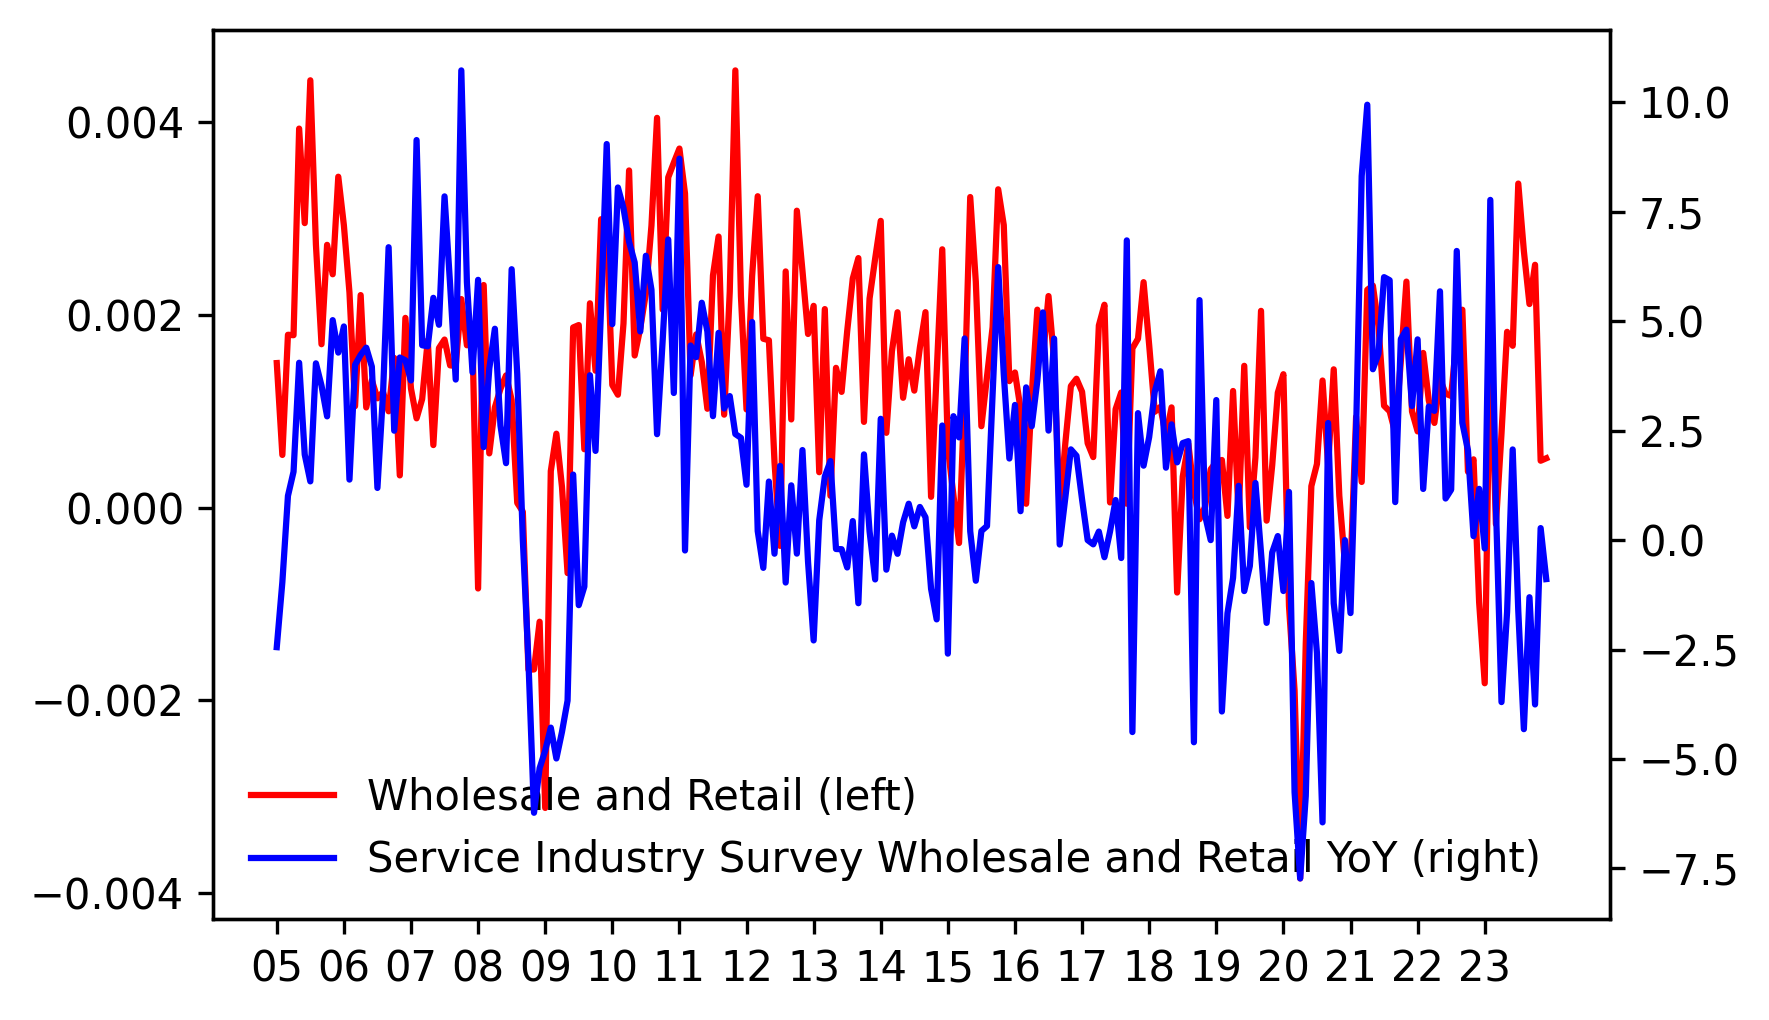

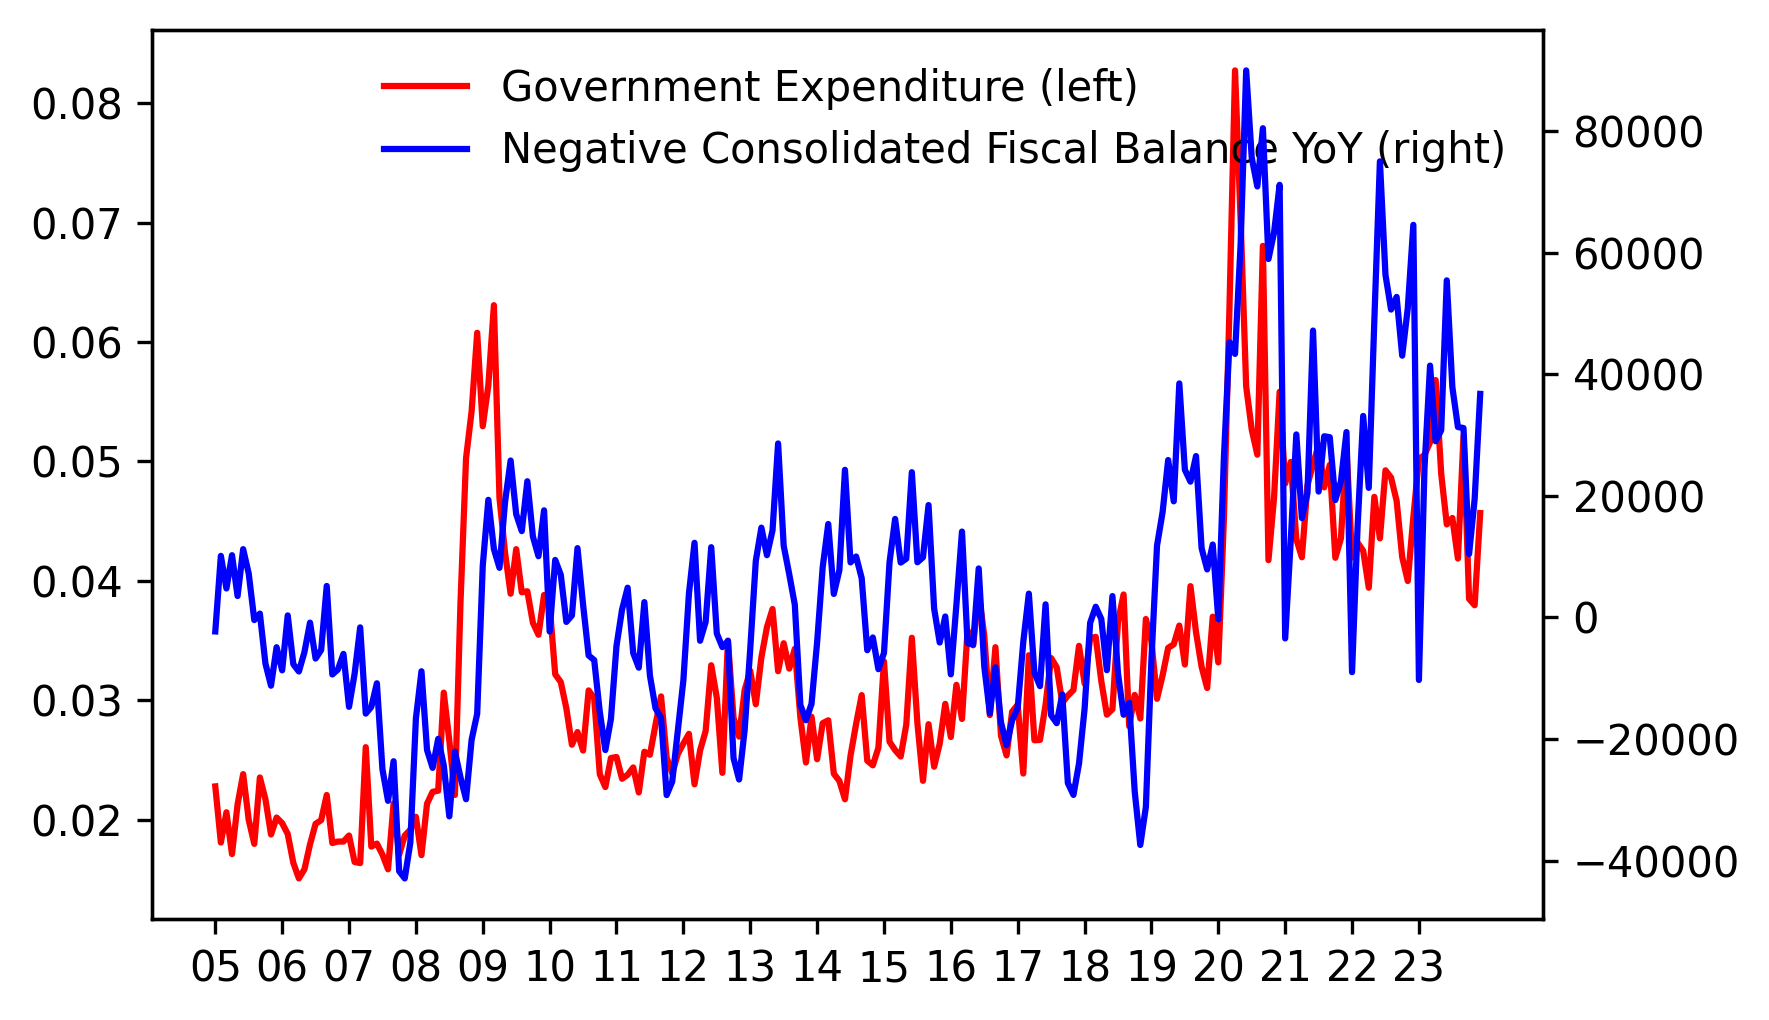

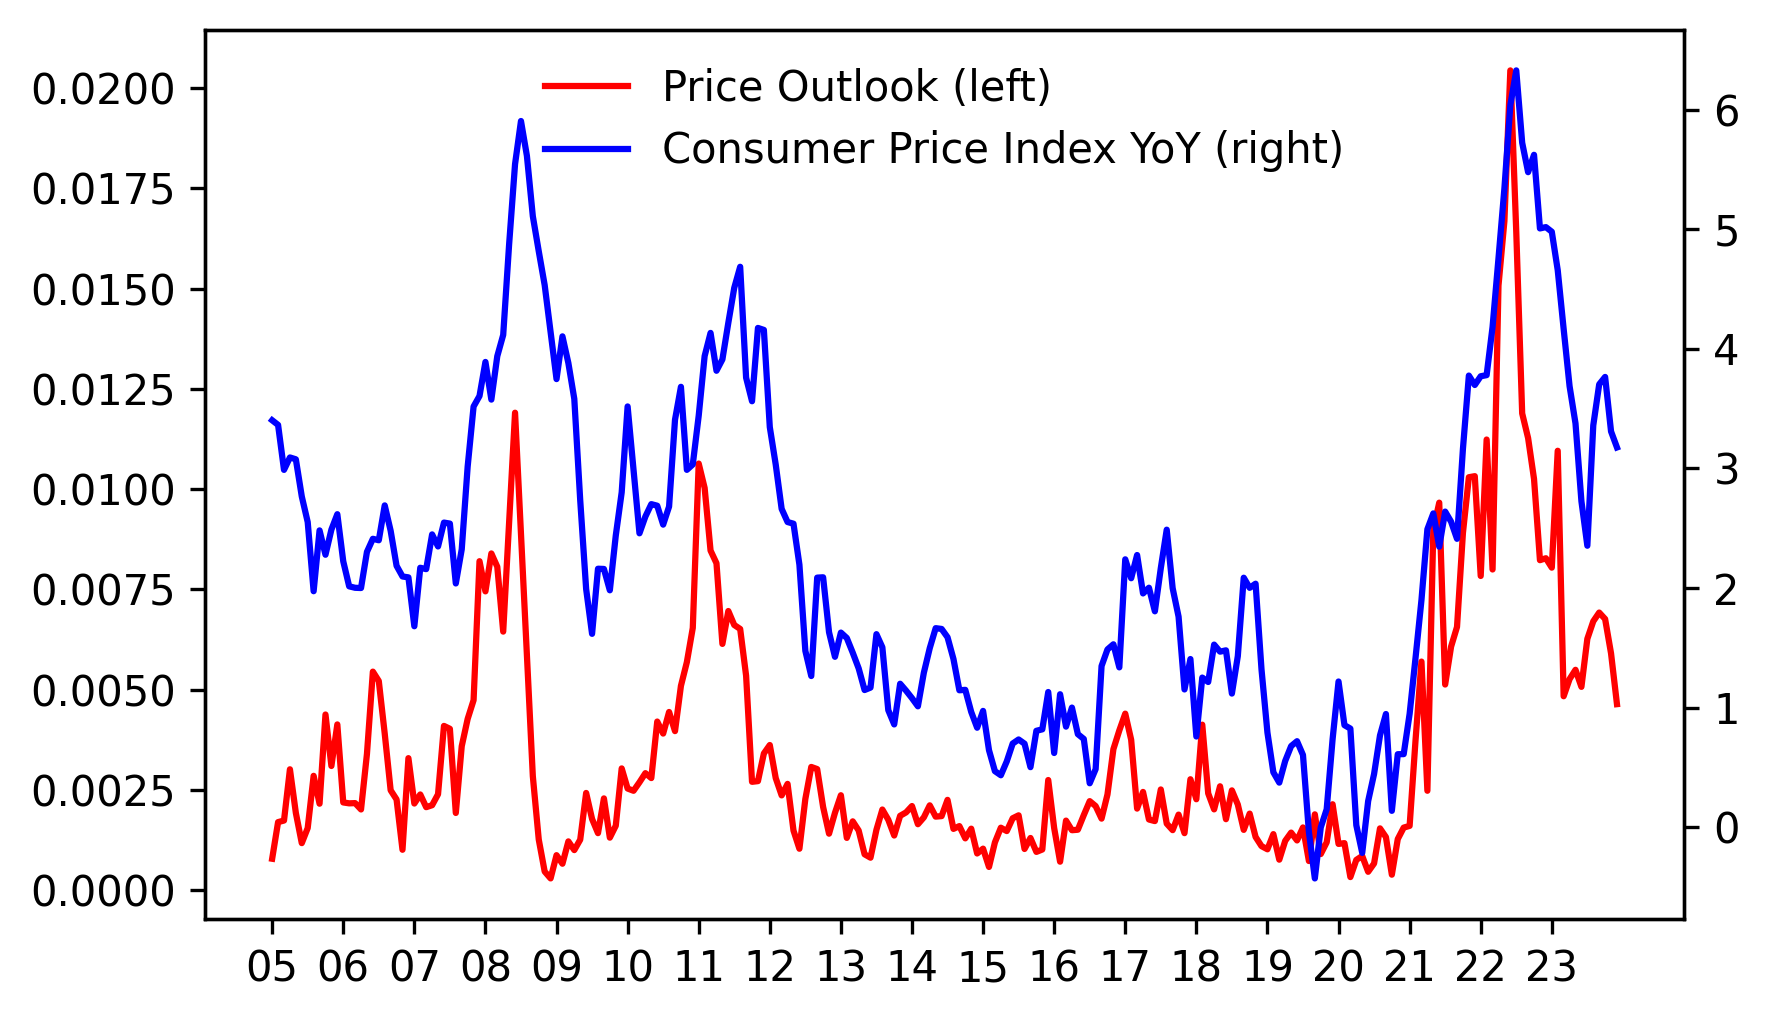

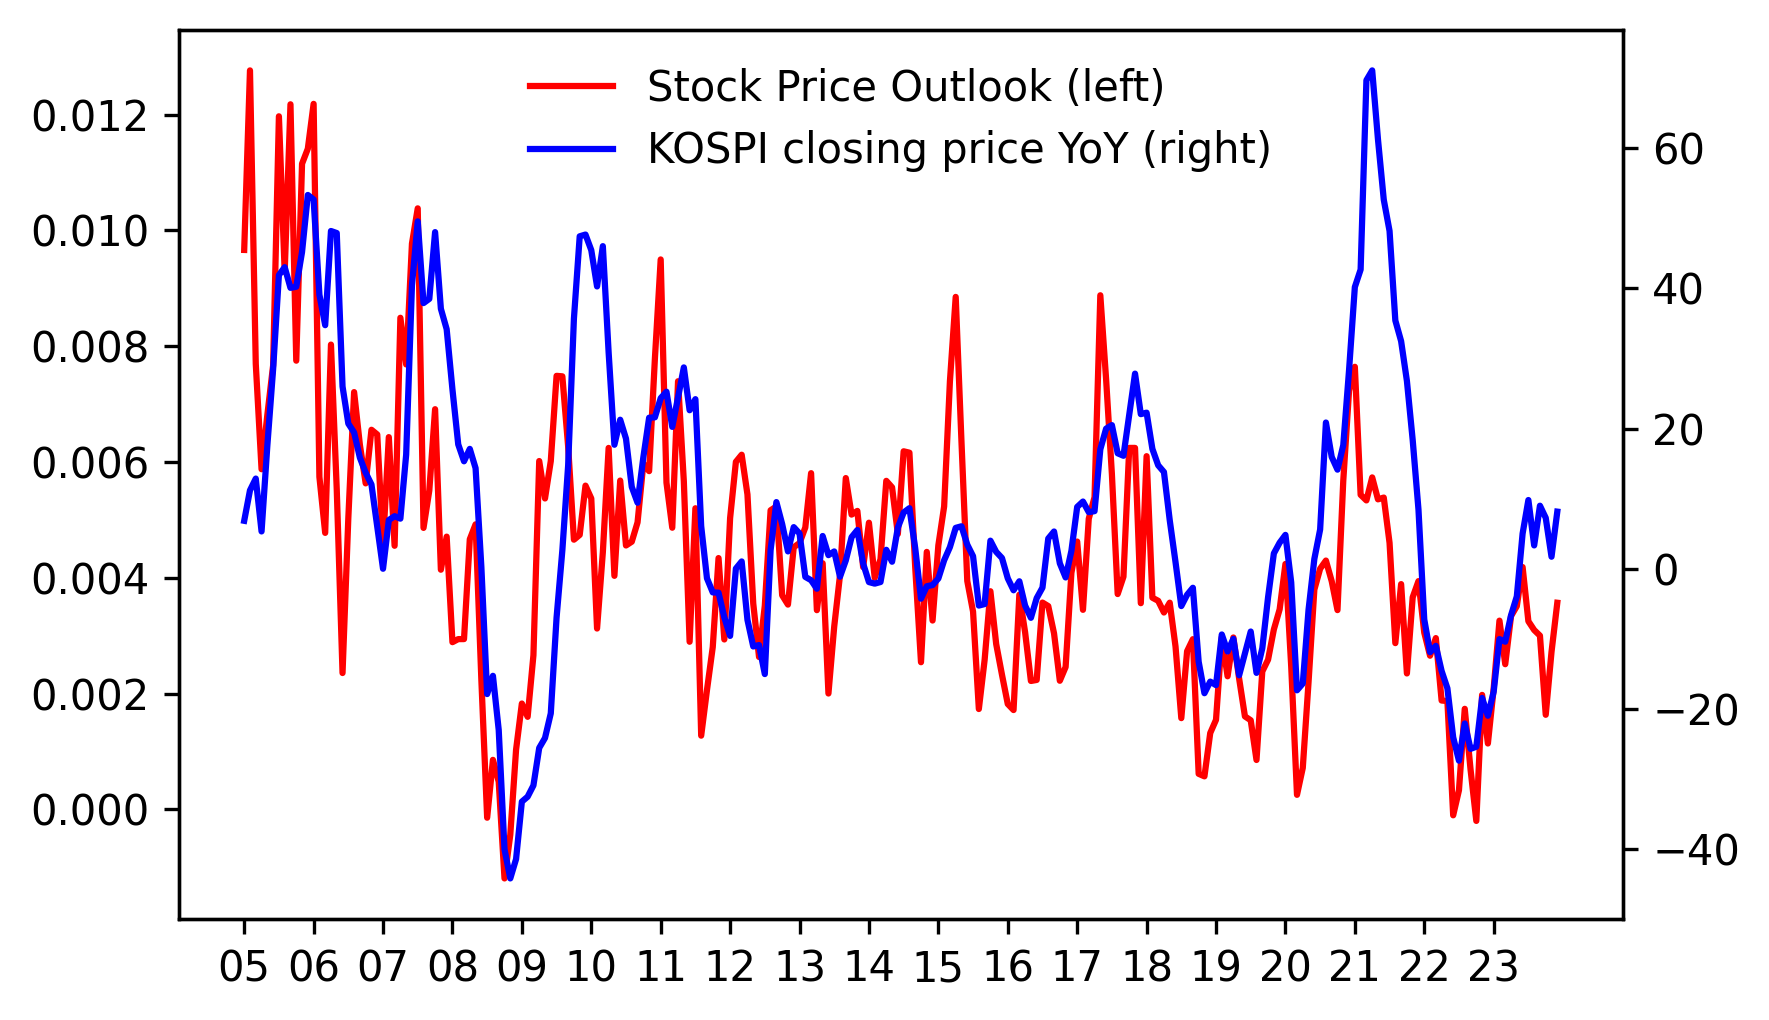

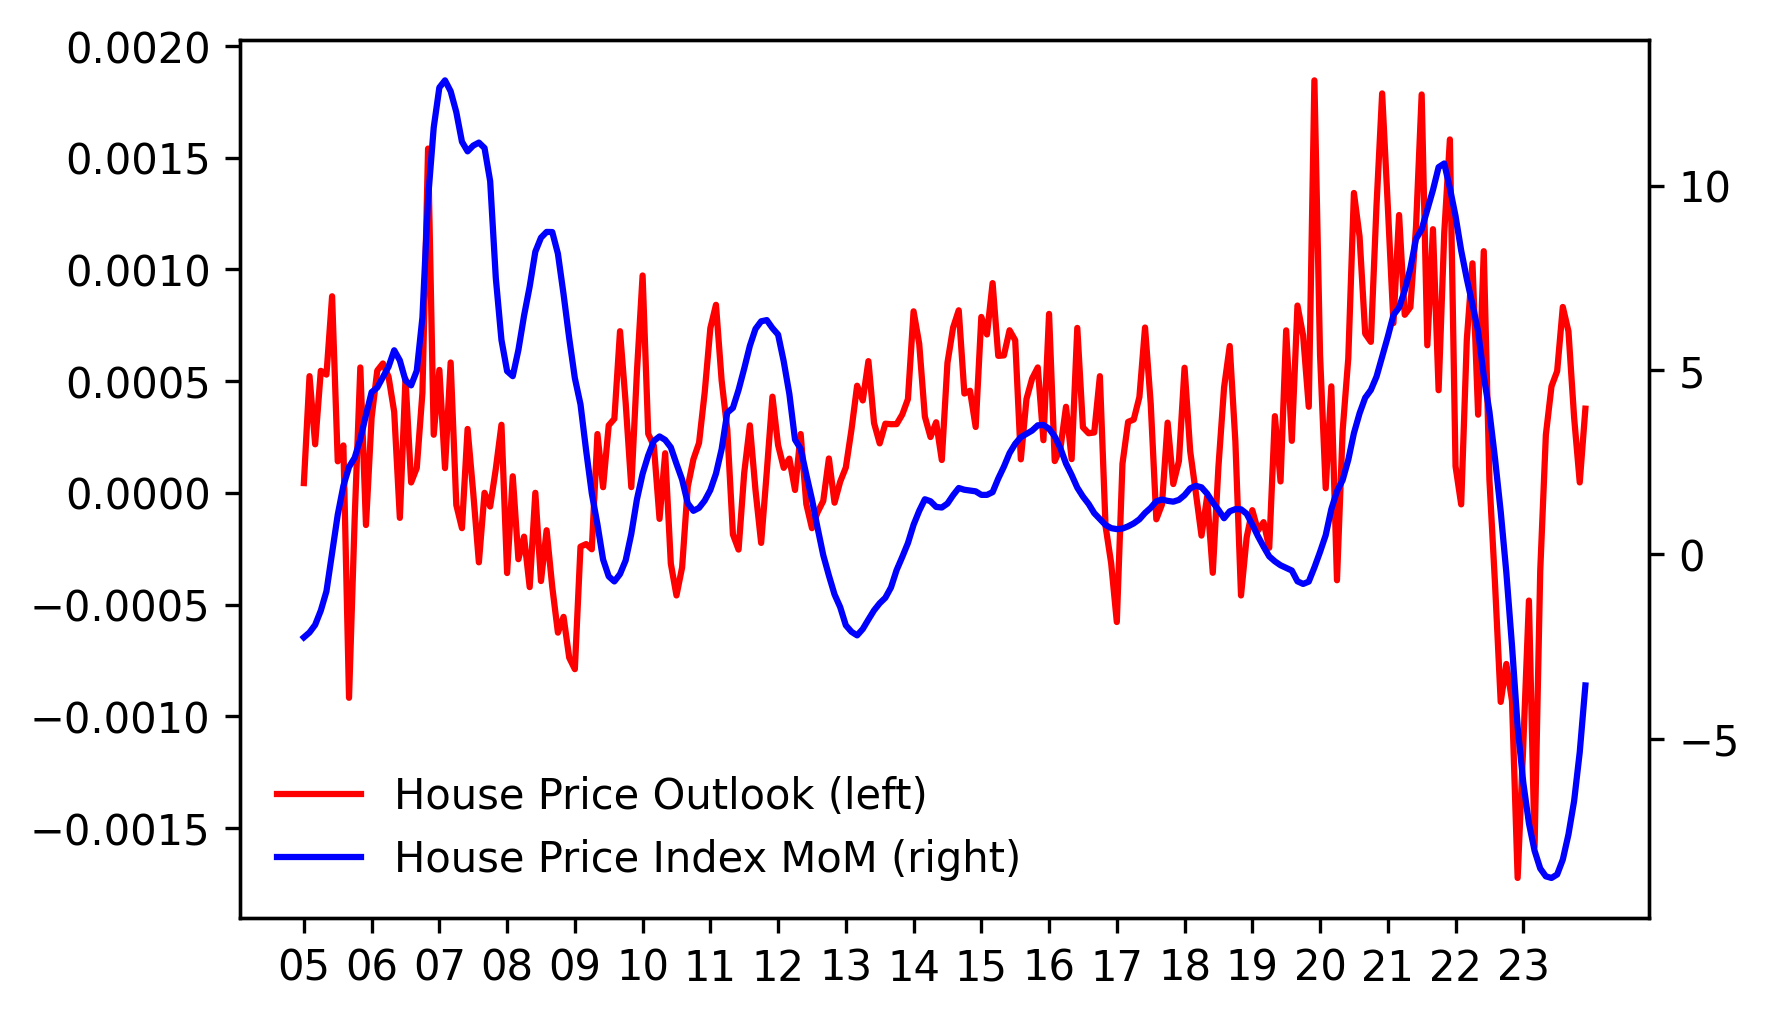

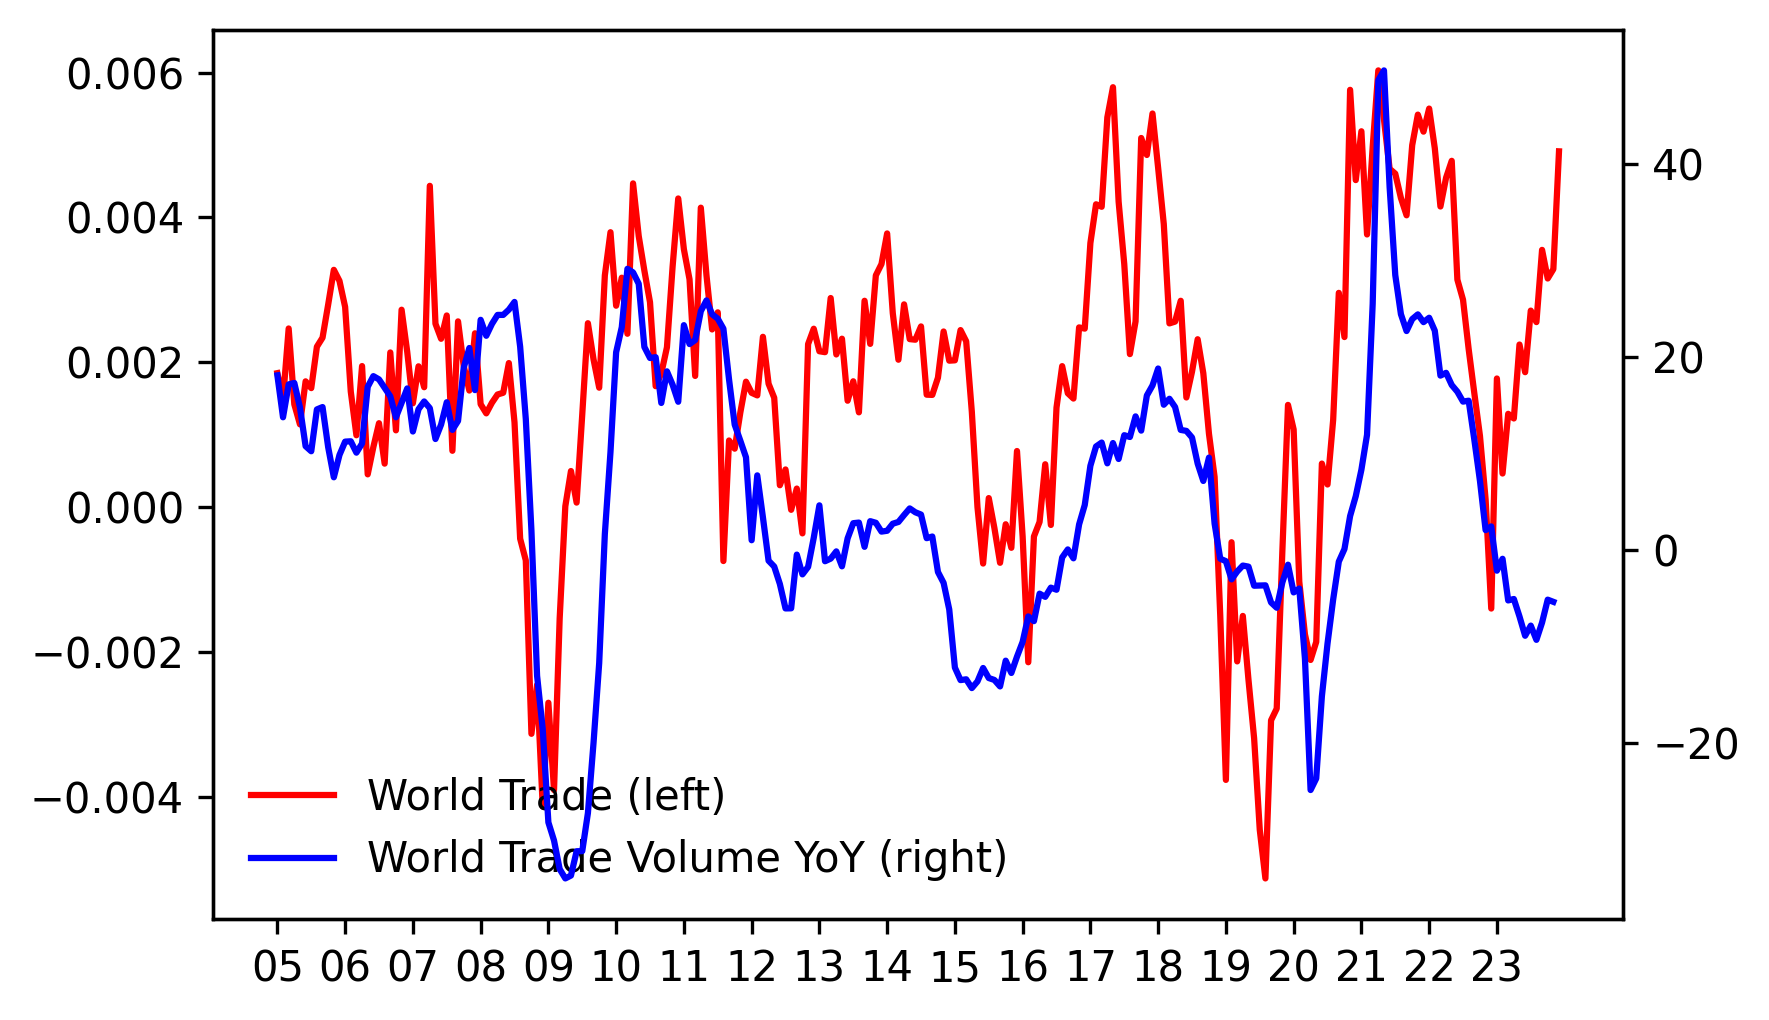

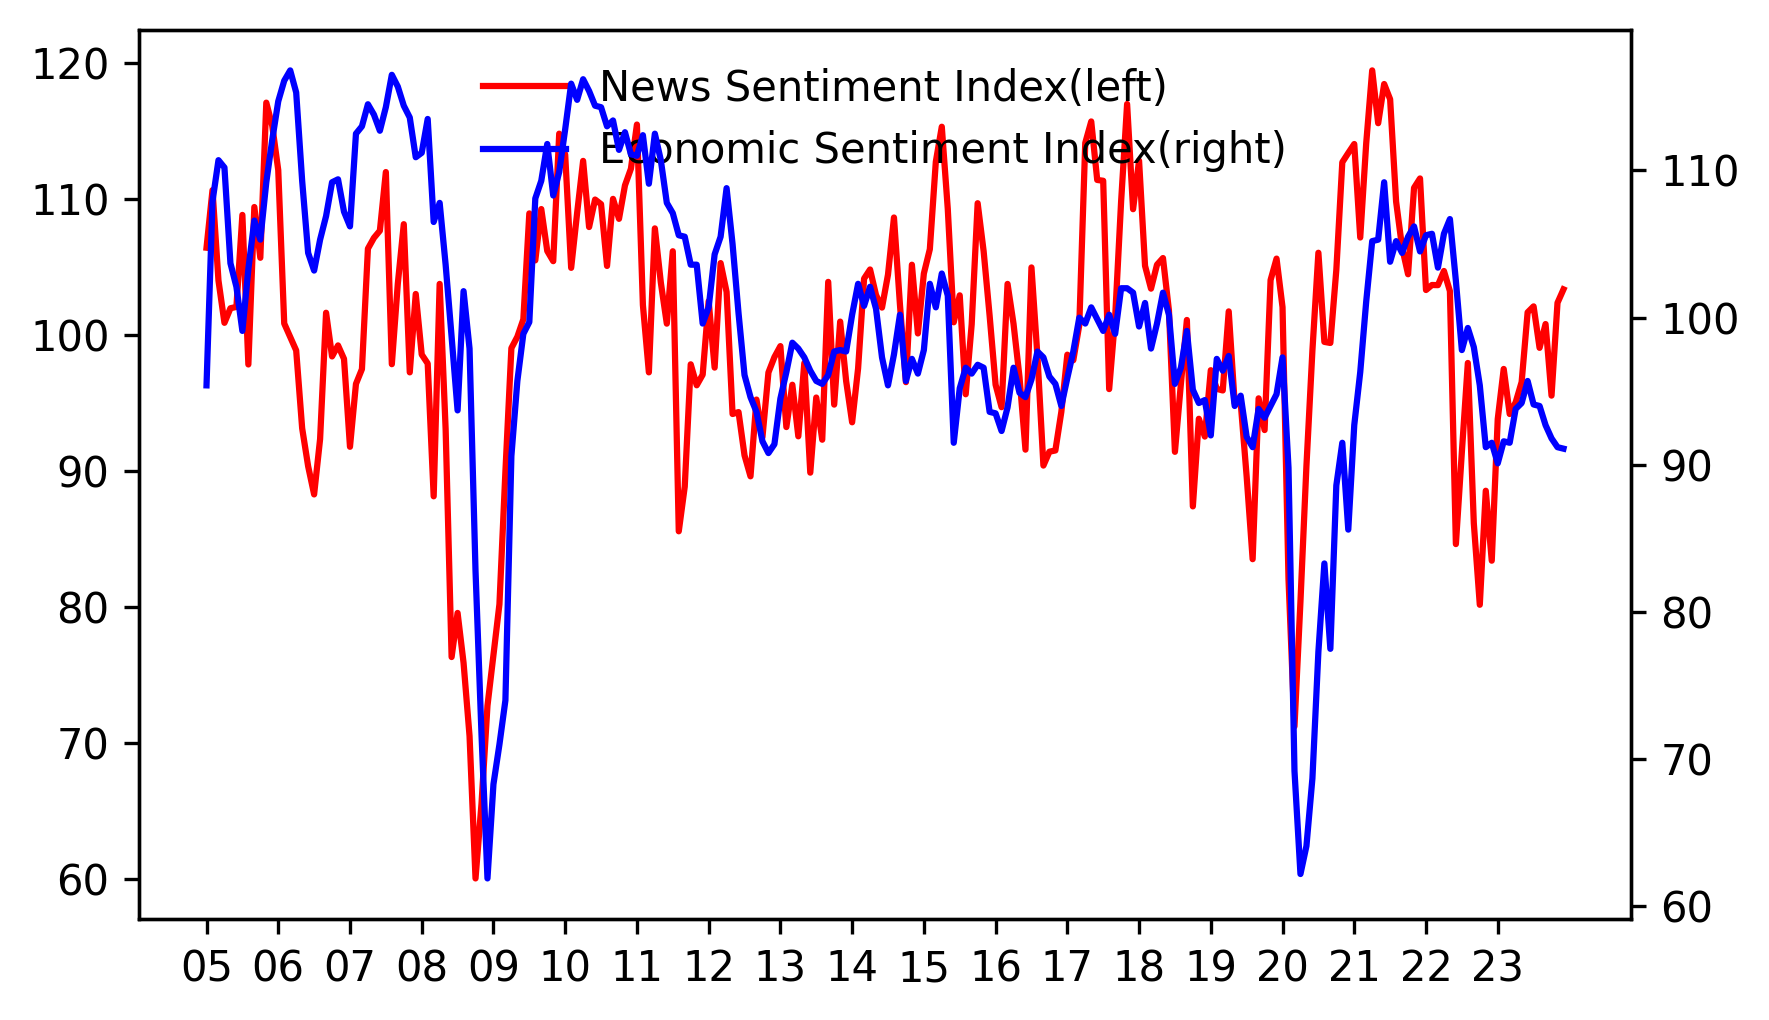

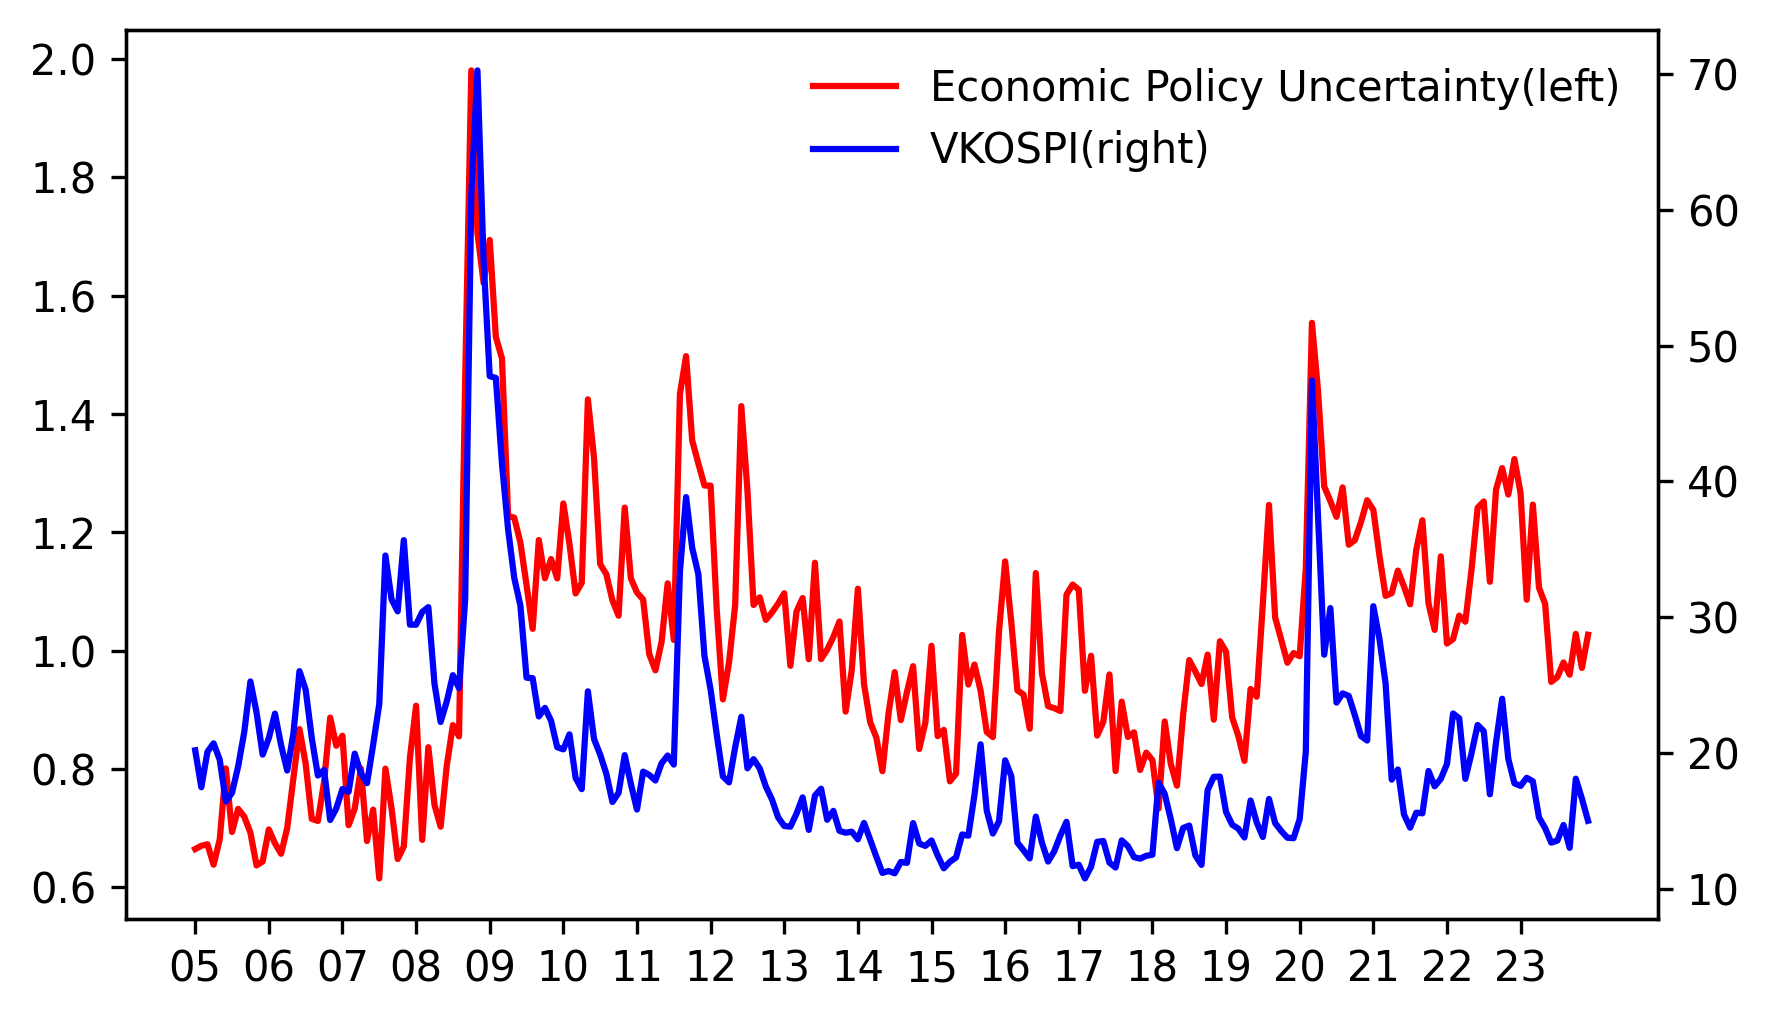

In [433]:
ncol = 2
nrow = 8

i = 0
for i in range(17):

    fig, ax1 = plt.subplots(1, 1, figsize=(6,3.5), dpi=300)

    fig.patch.set_facecolor('white')
    ax2 = ax1.twinx()

    lns1 = ax1.plot(ts.iloc[:,2*i], color='r', label=labels[2*i])
    lns2 = ax2.plot(ts.iloc[:,2*i+1], color='b', label=labels[2*i+1])
    
    lns = lns1+lns2
    labs = [l.get_label() for l in lns]
    
    if i in [0,1,7,8,9,13,14]: loc='lower left'
    elif i in [3,7]: loc='lower center'
    elif i in [2,4,10,16]: loc='upper right'
    else: loc='upper center'
    
    ax1.legend(lns, labs, loc=loc, frameon=False)

    ax1.set_xticks(ticks=[12*x for x in range(int(218/12))]+[12*18],
               labels=[x[2:4] for z,x in enumerate(ts.index) if z%12==0],#+['22'],
               rotation=0)
    plt.tight_layout()    
#     plt.savefig('./fig/news_{}'.format(i),dpi=300)

---

#### Correlation analysis

In [434]:
# Time lagged cross correlation
def crosscorr(datax, datay, lag=0):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 

    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    return datax.corr(datay.shift(lag))

<Figure size 4200x7200 with 0 Axes>

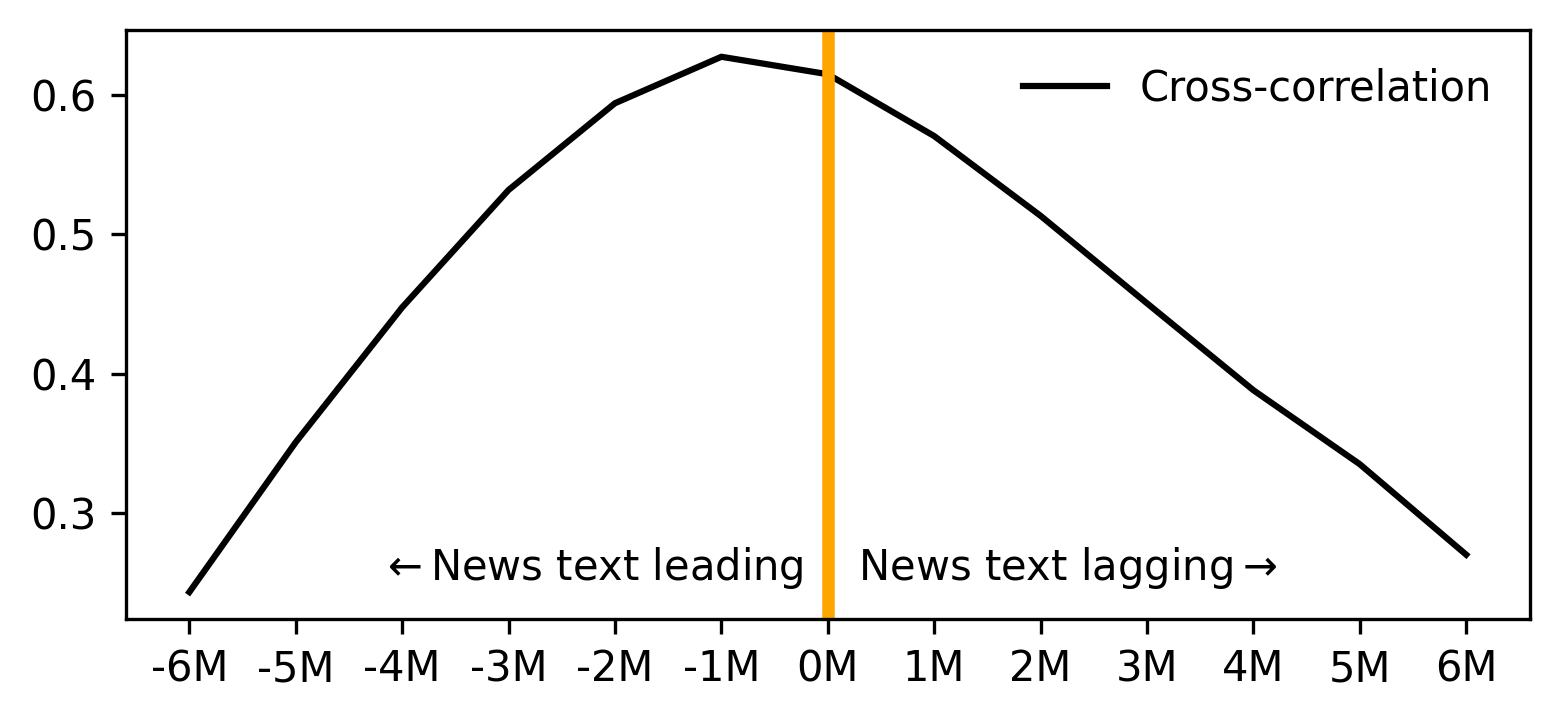

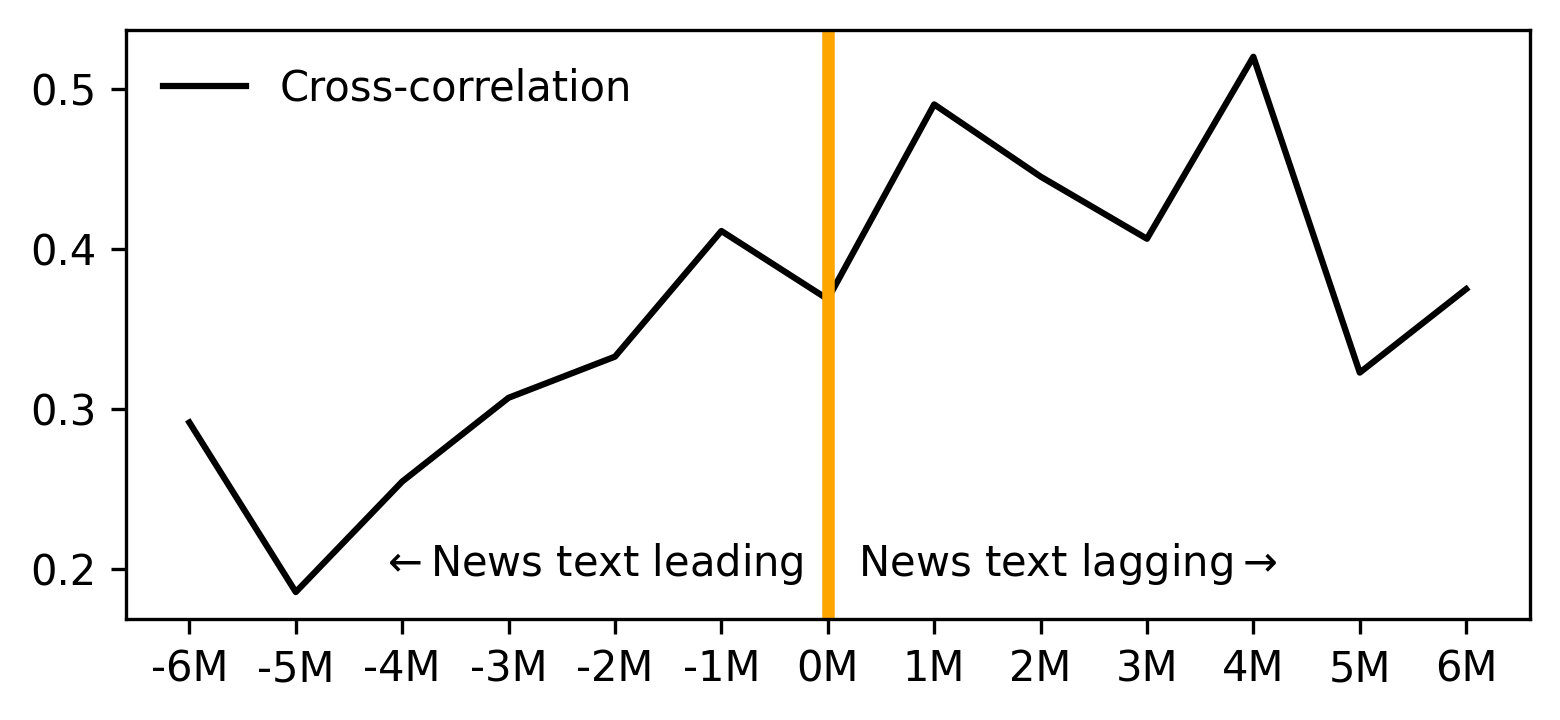

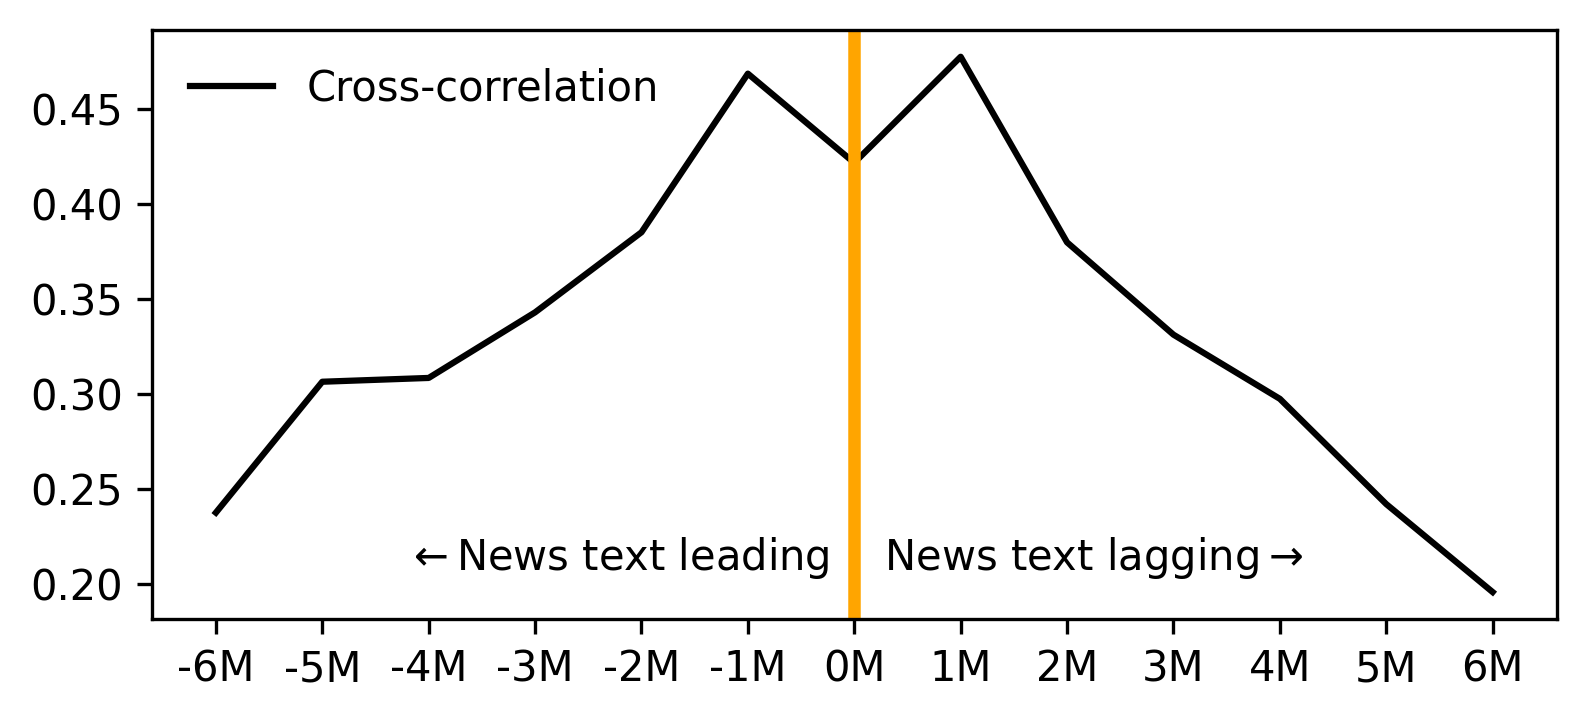

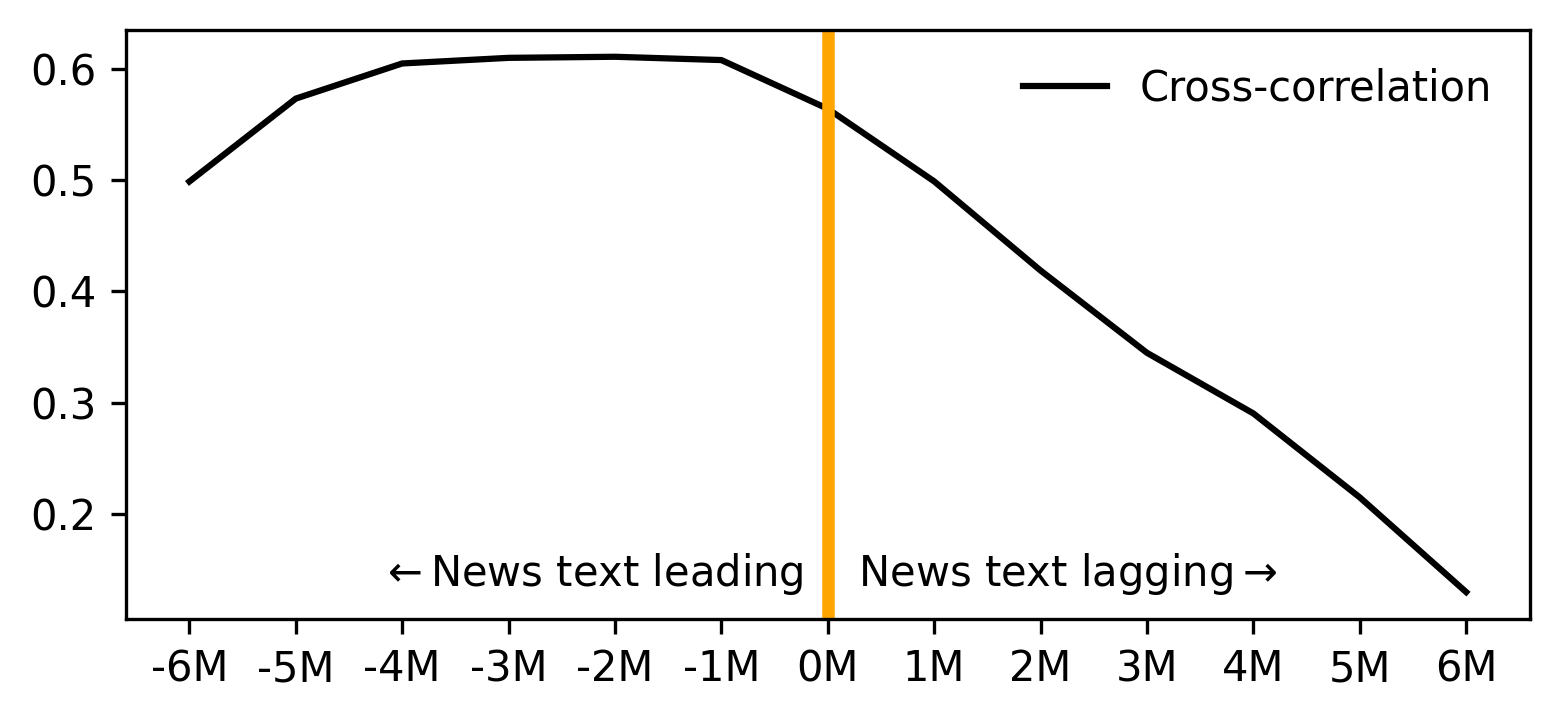

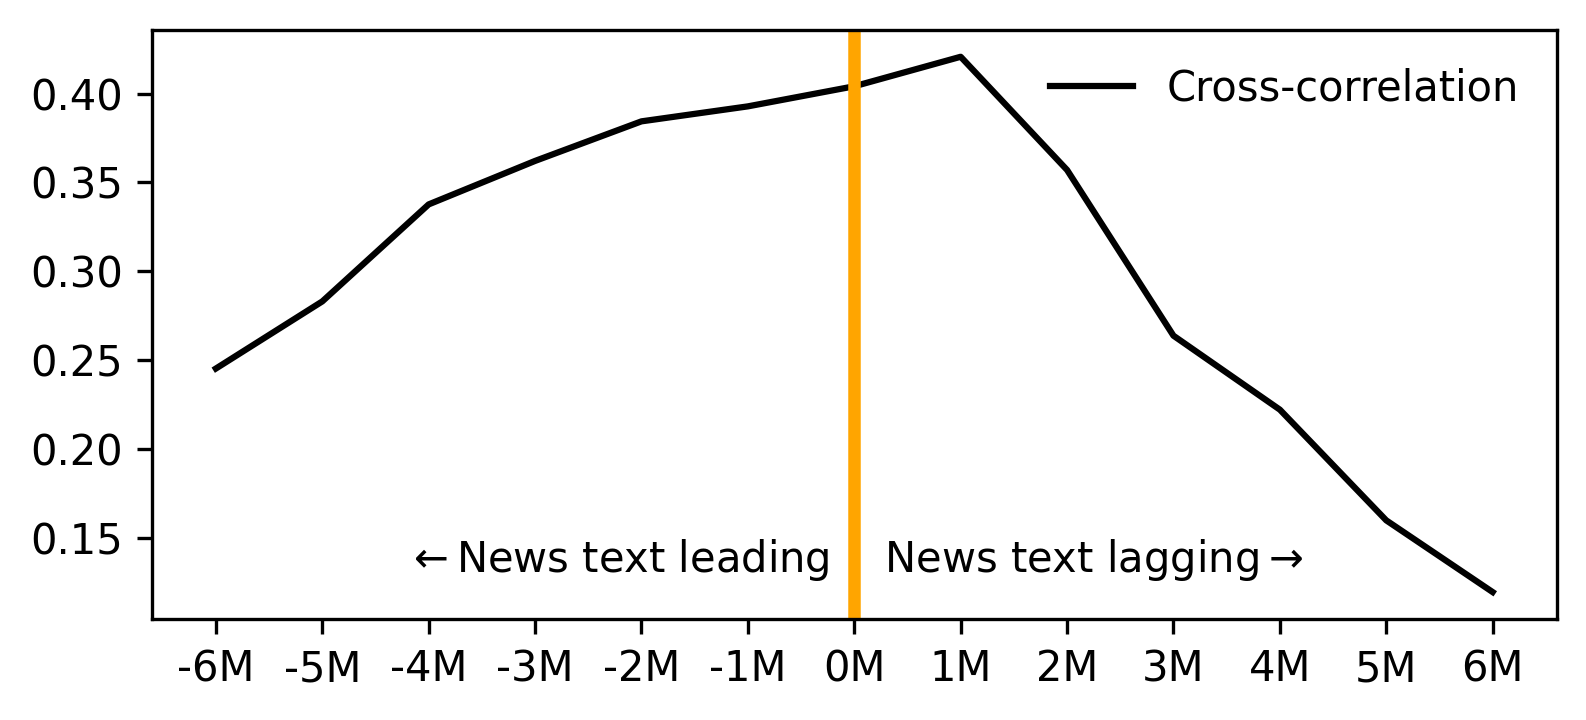

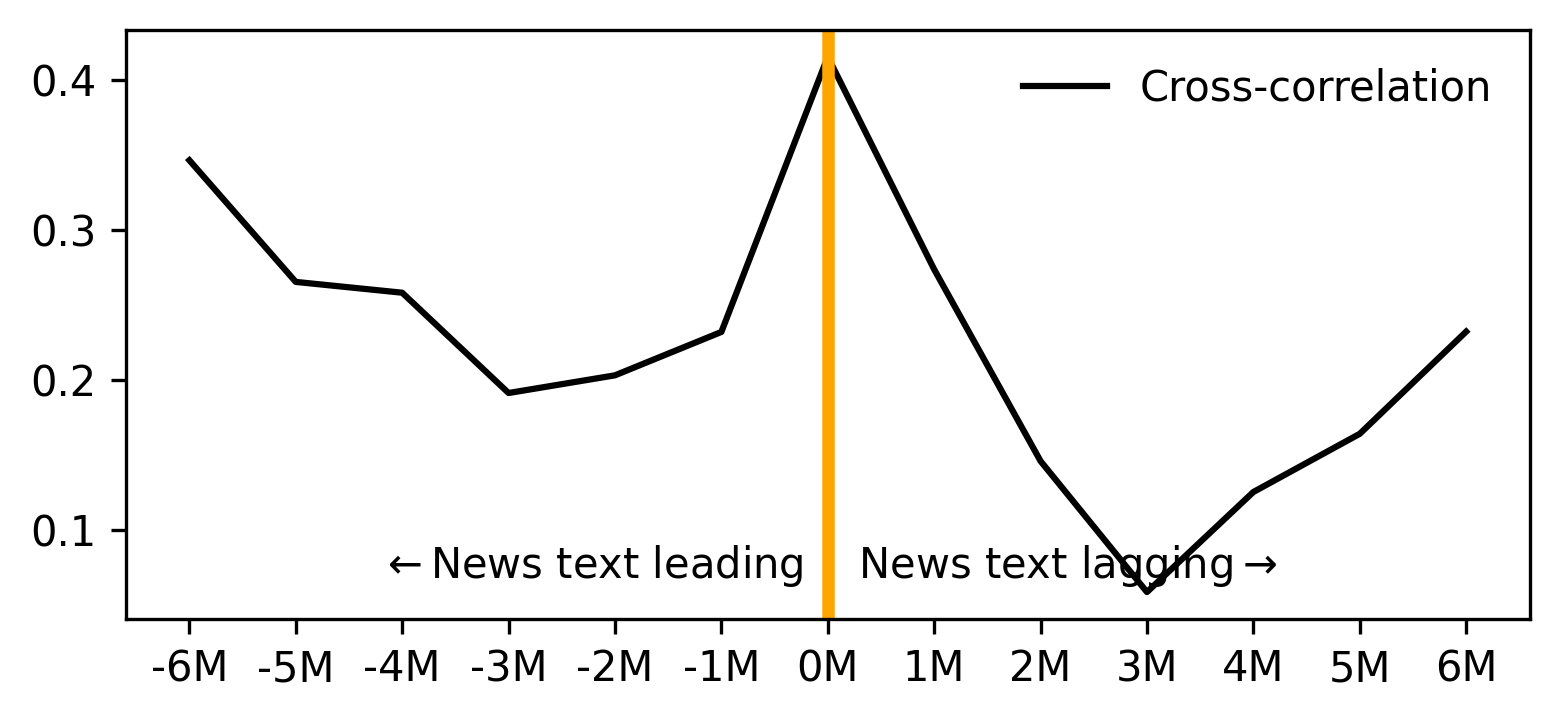

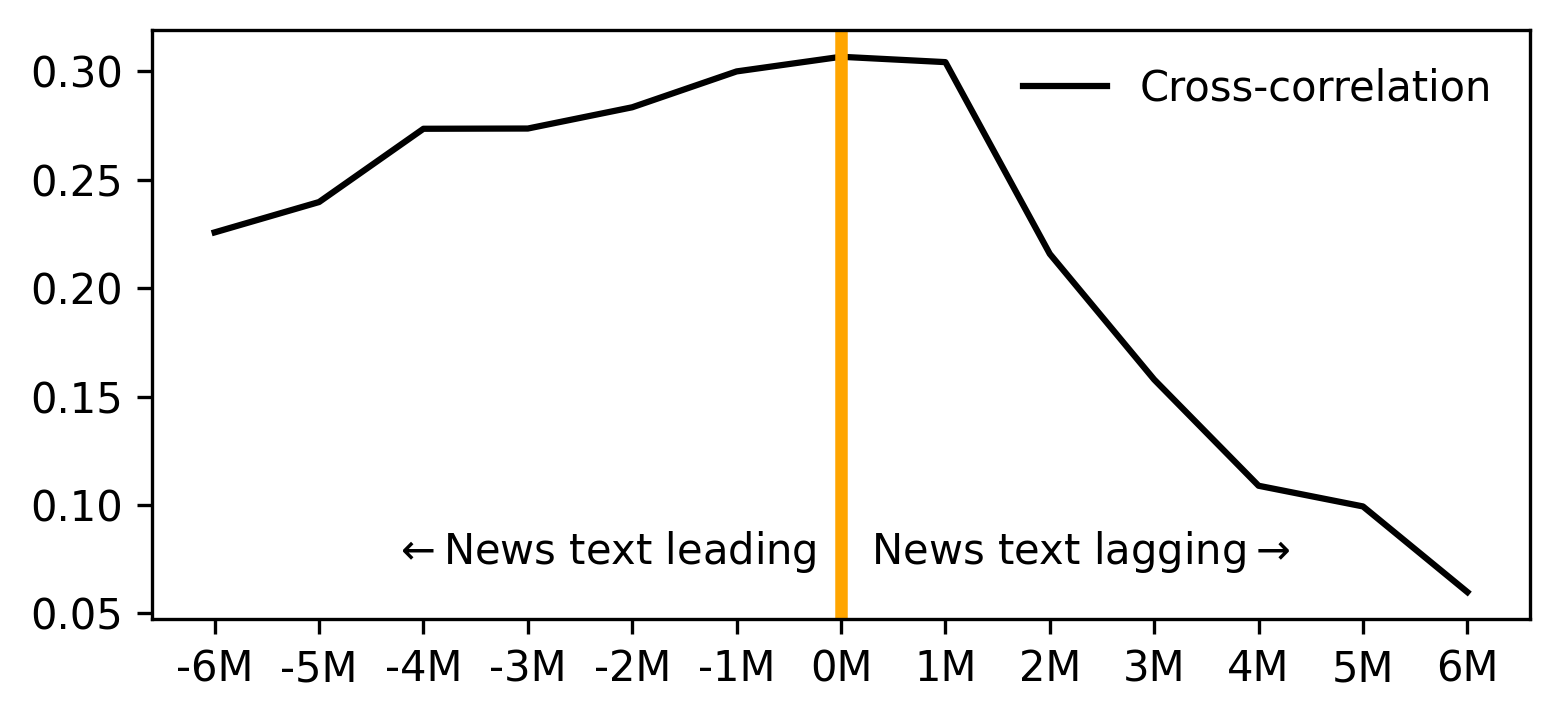

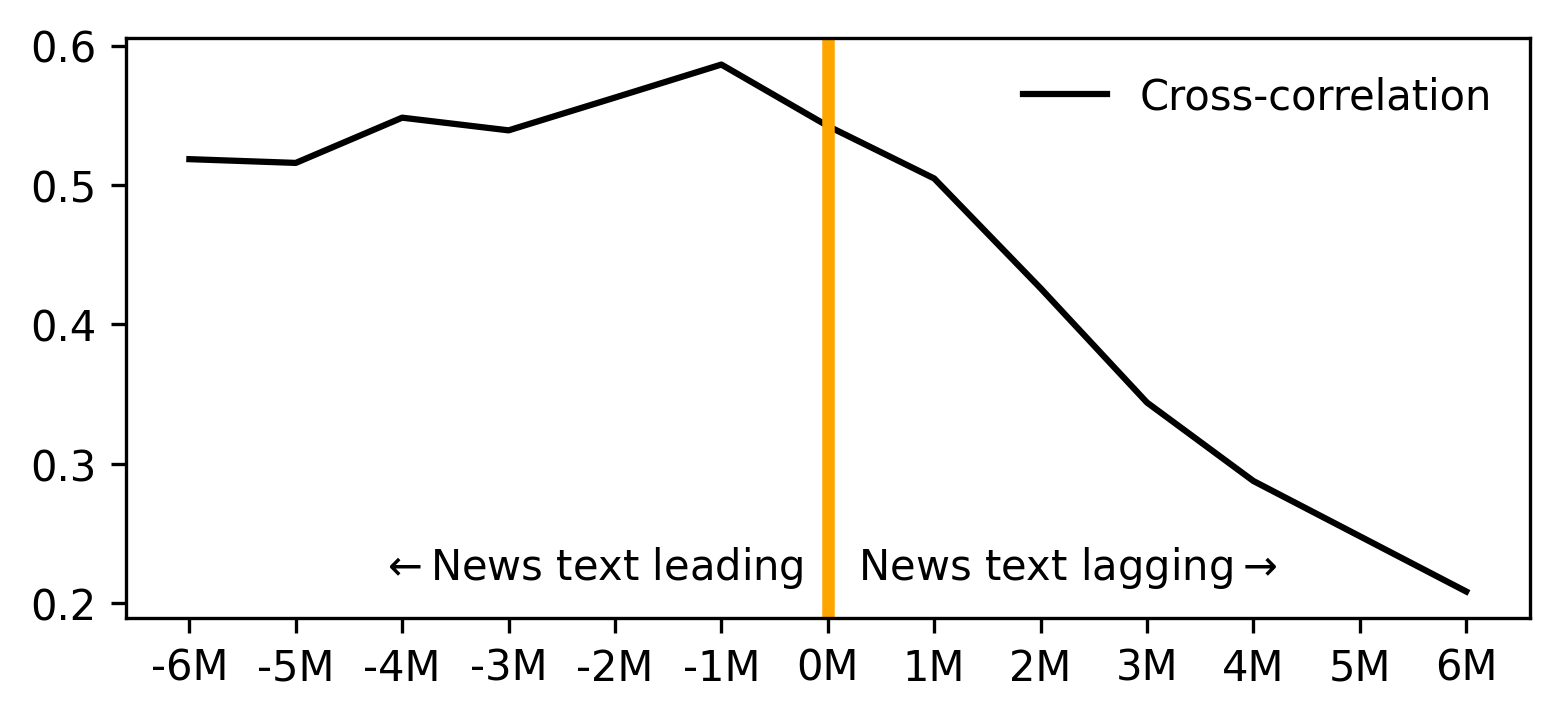

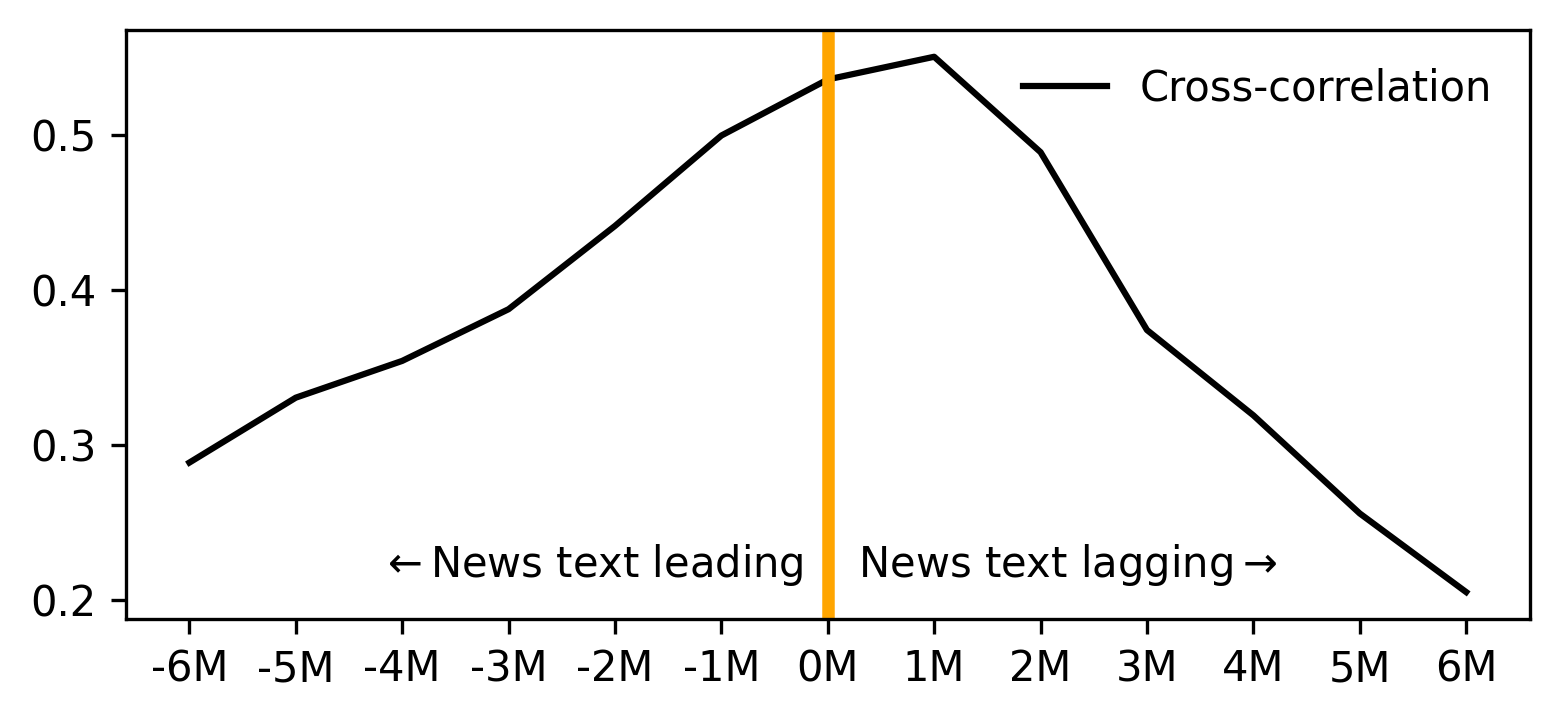

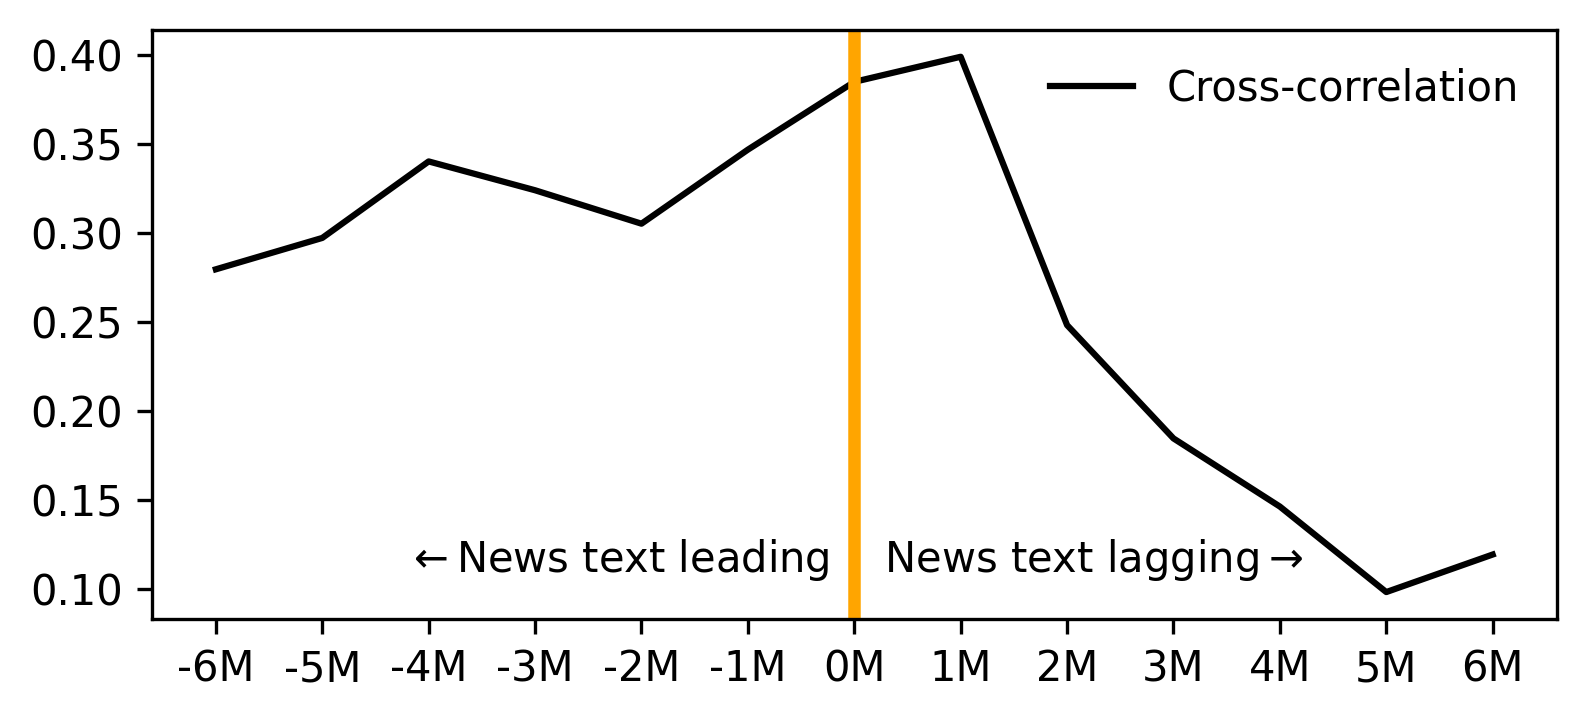

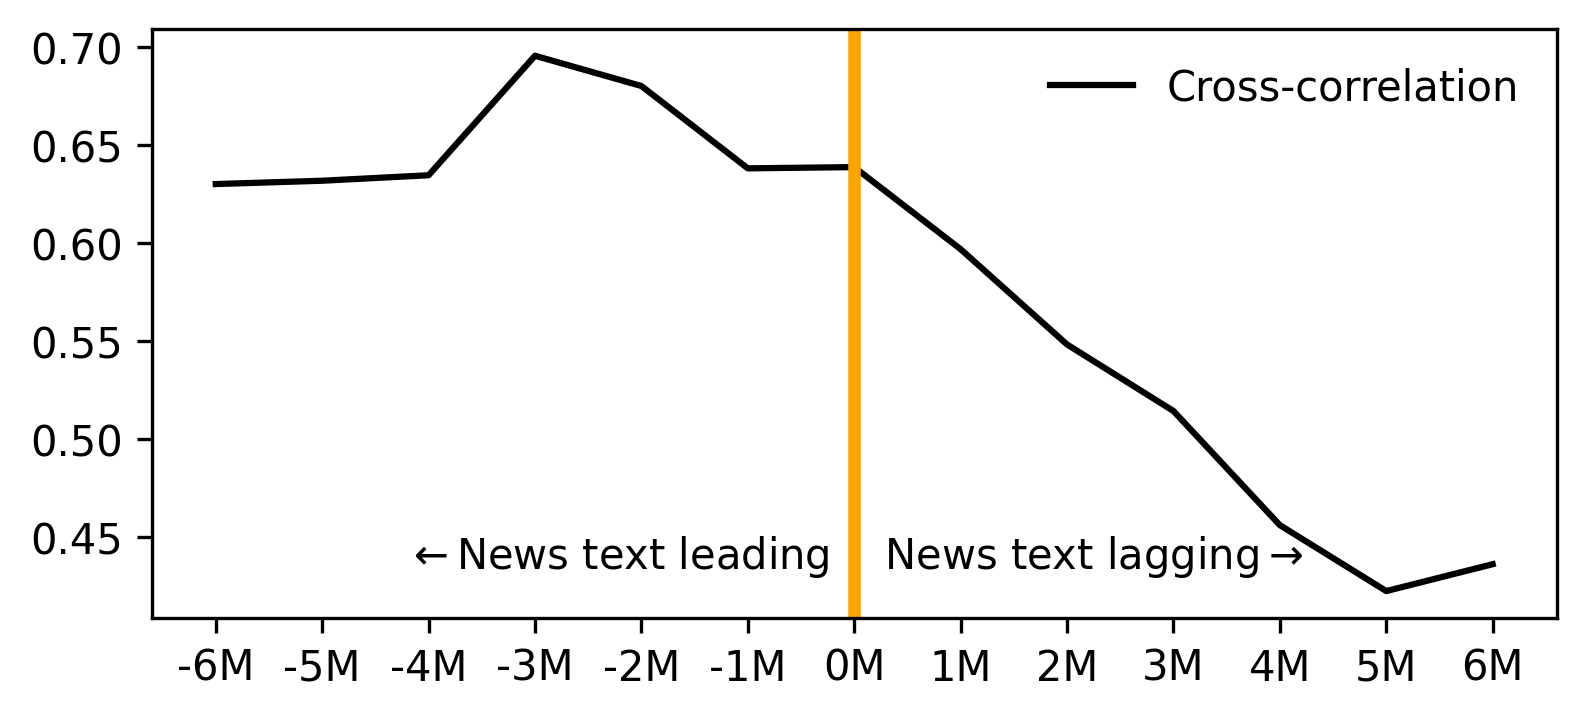

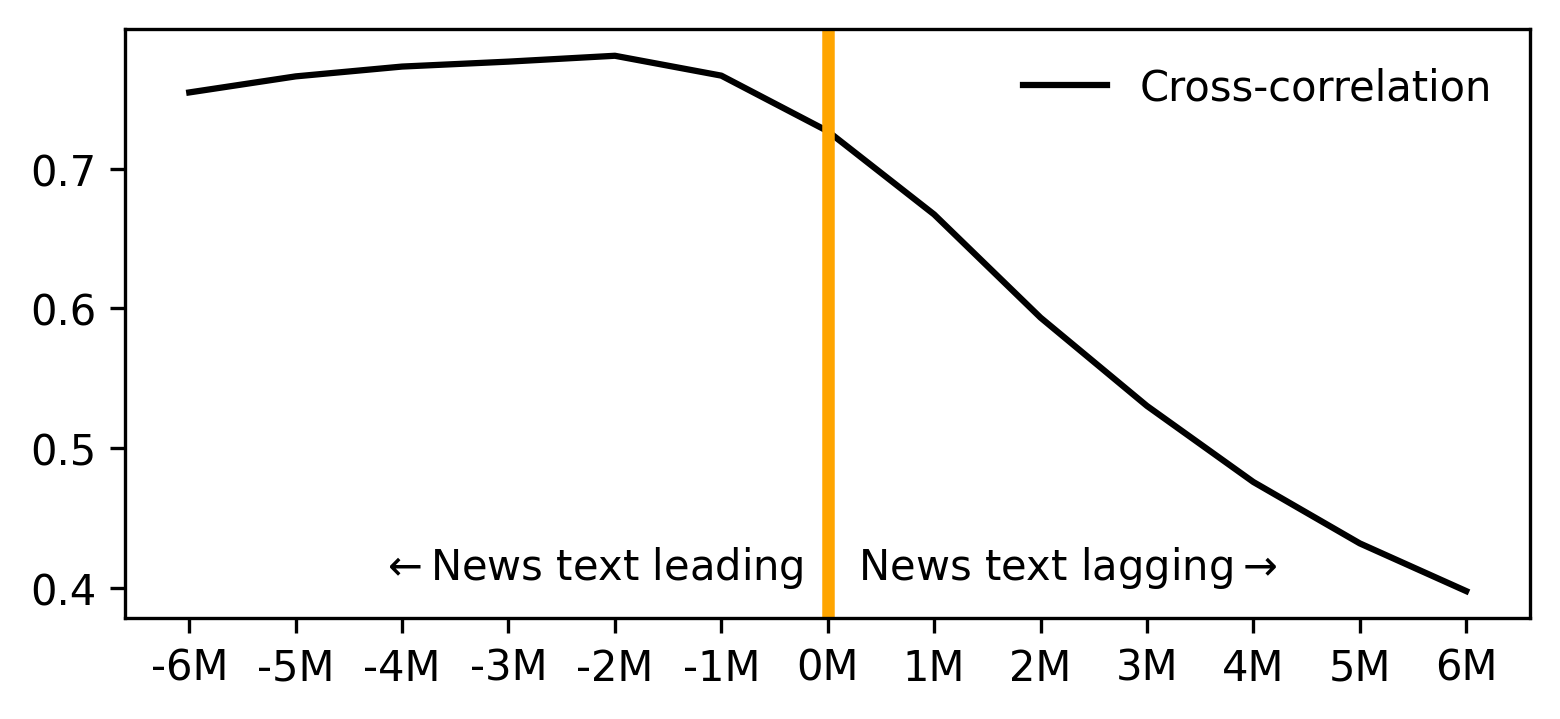

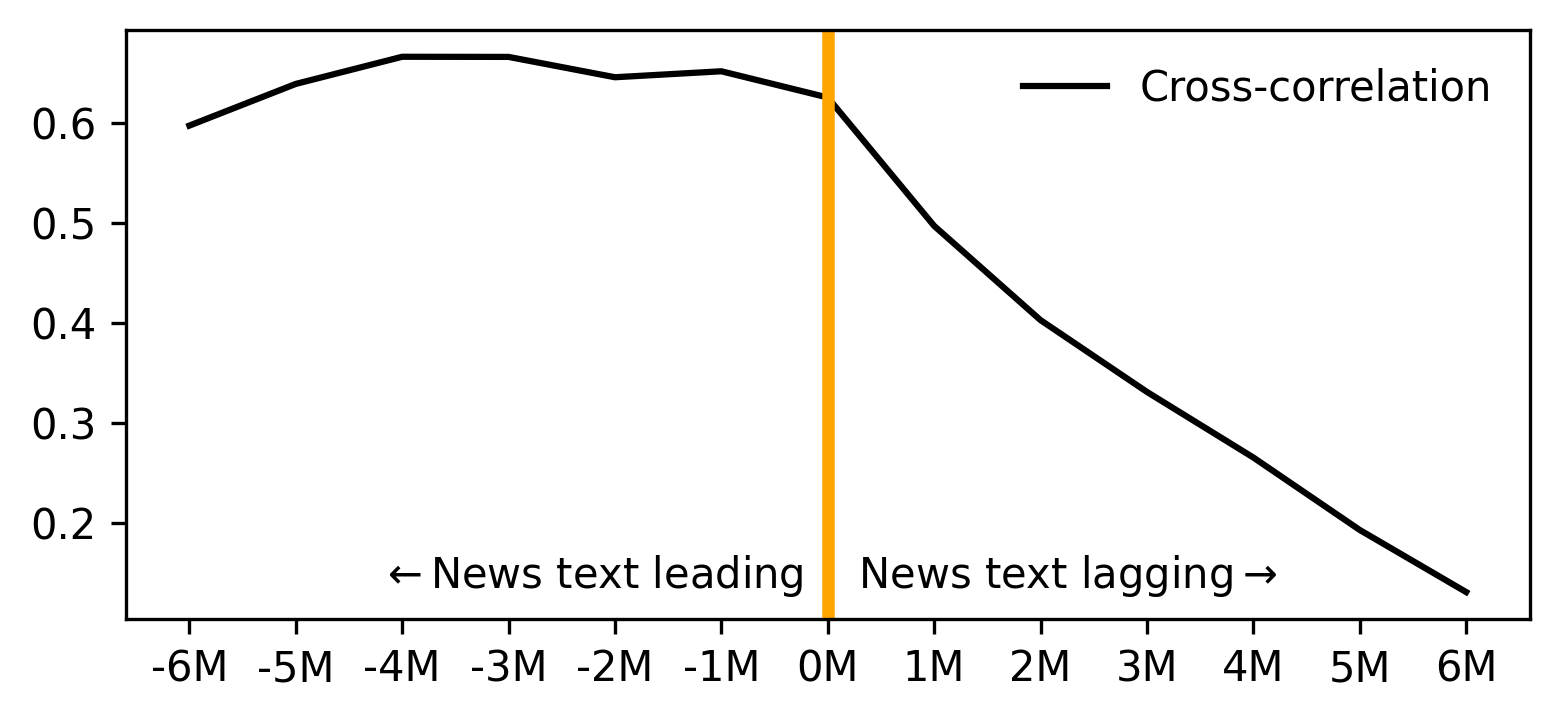

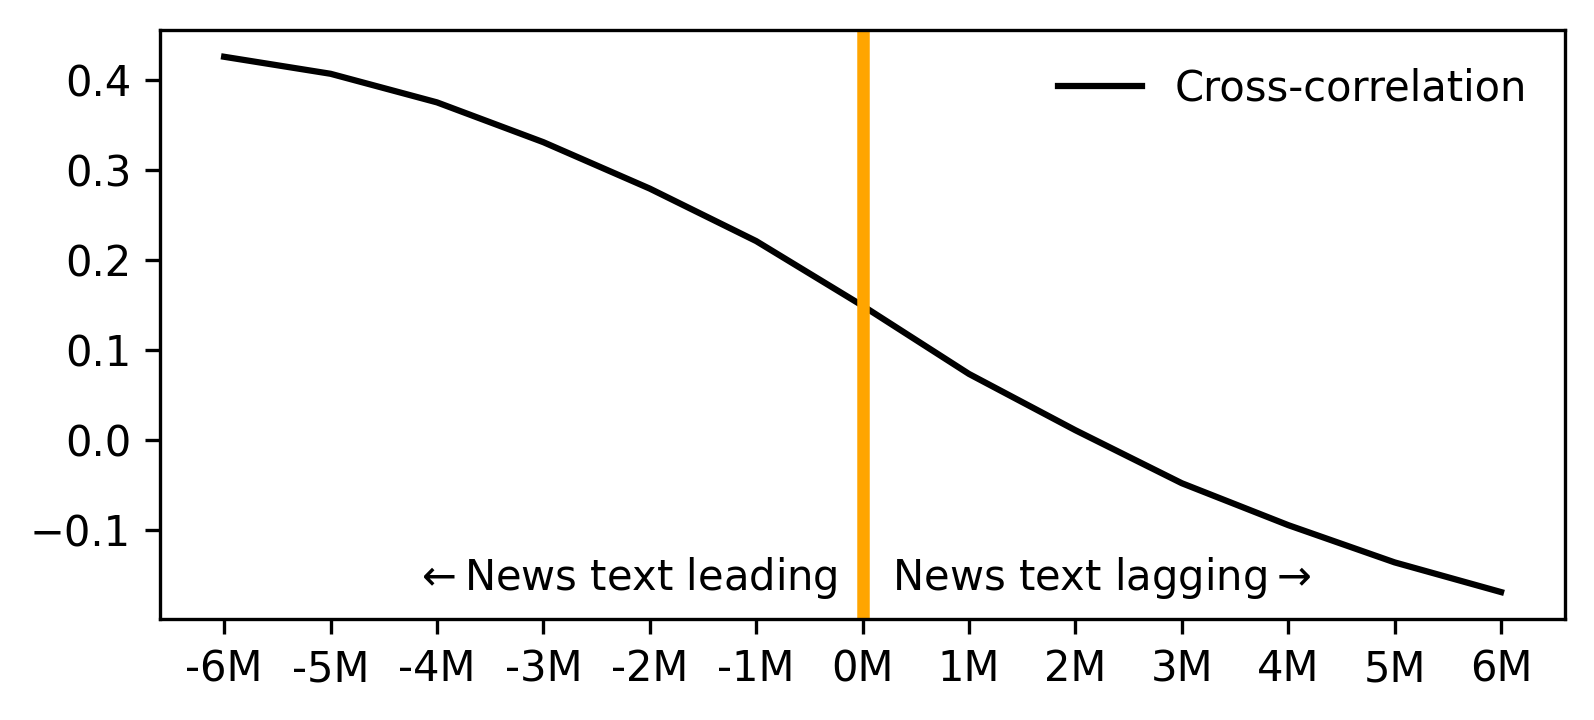

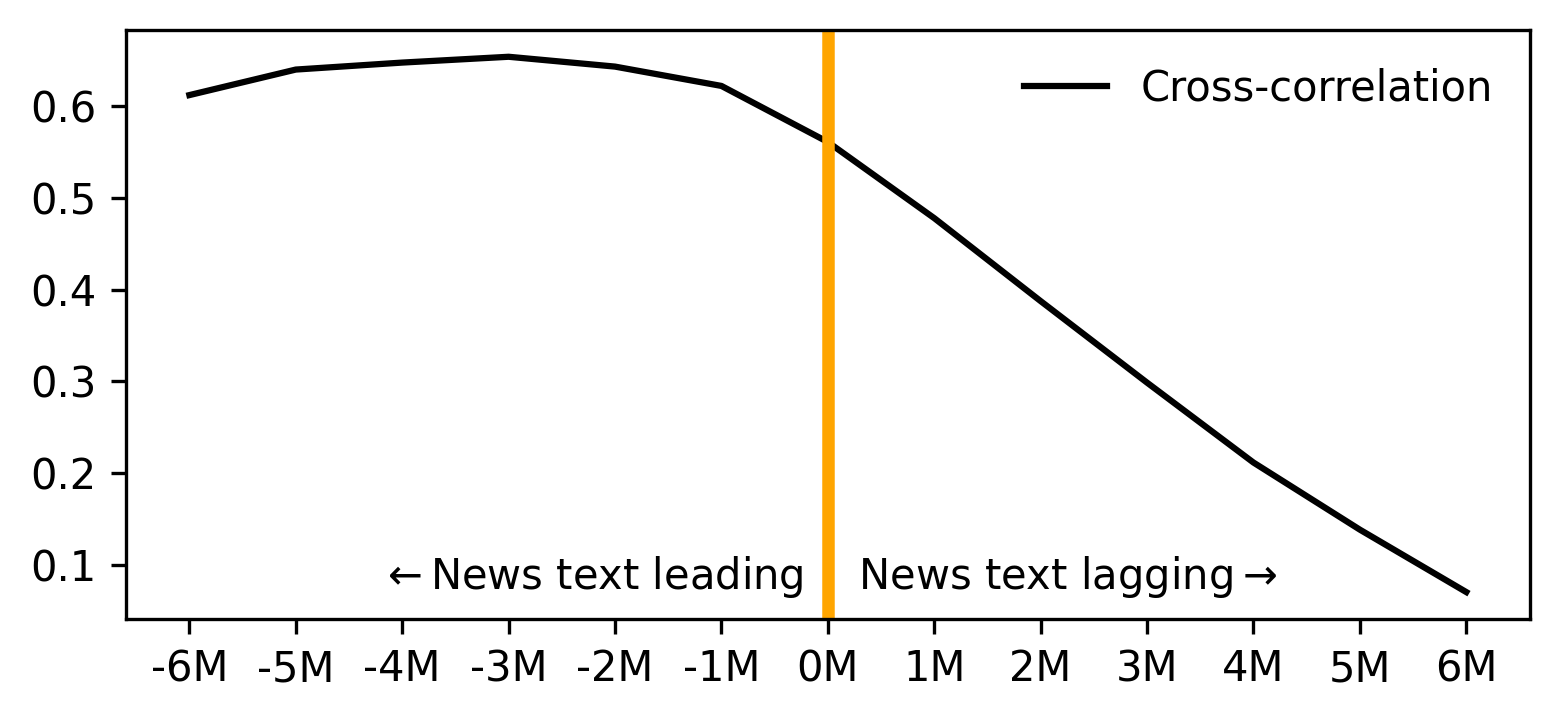

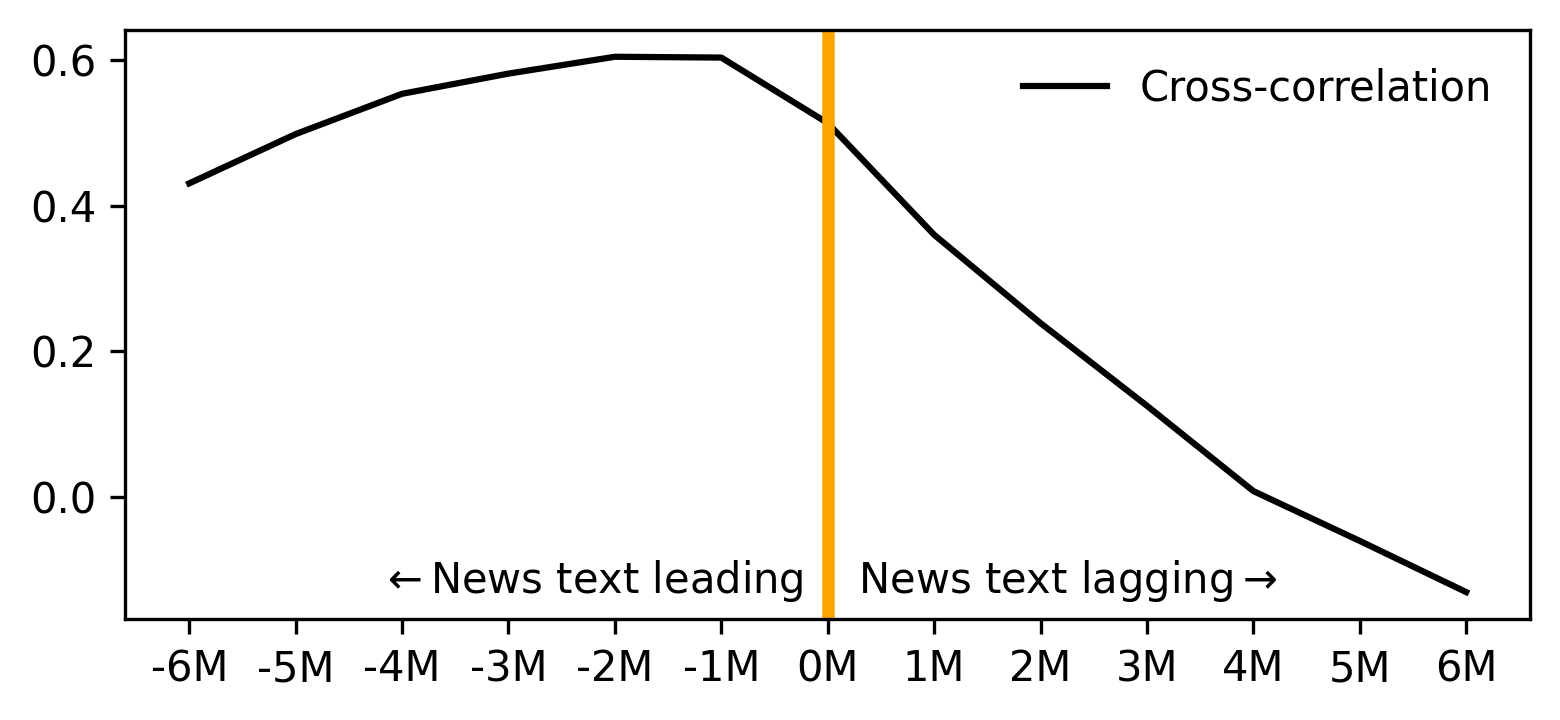

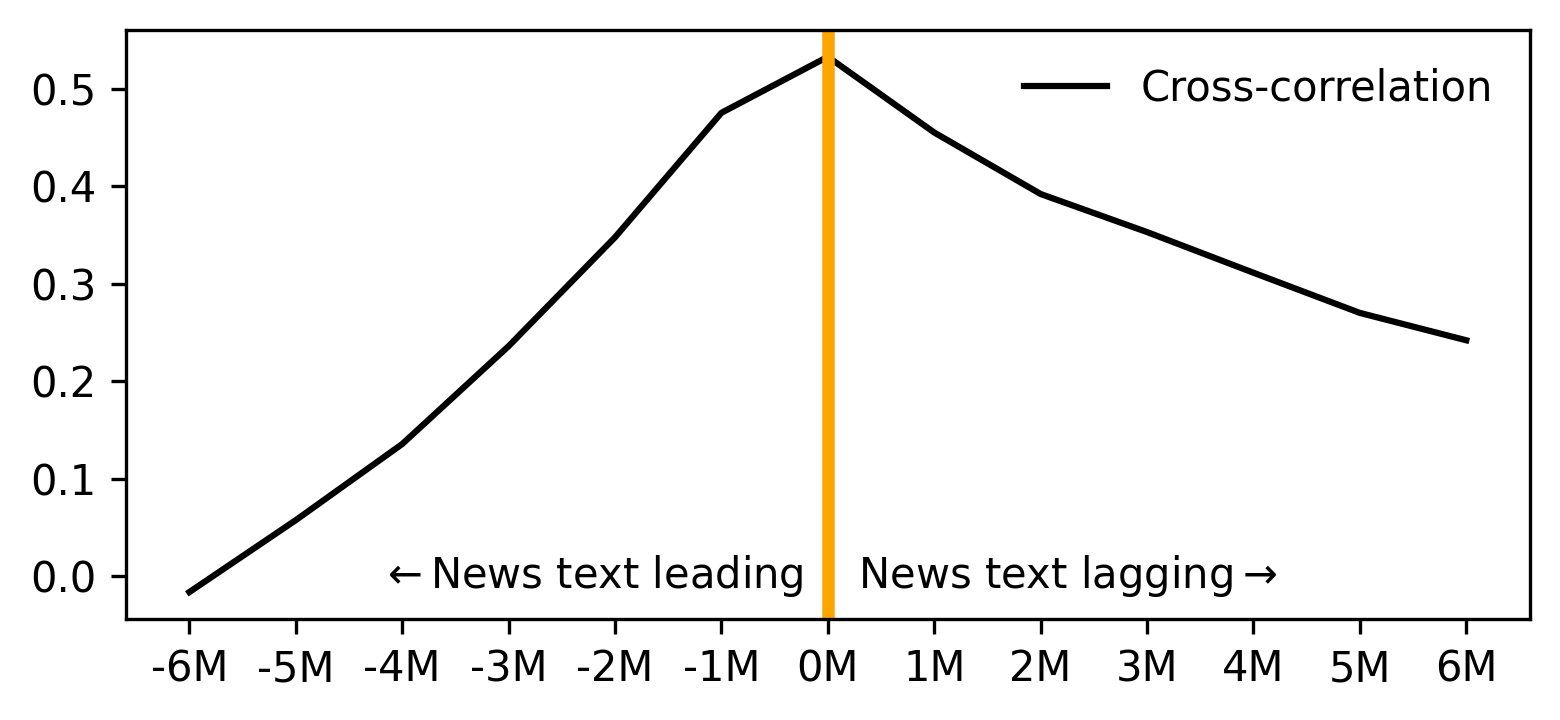

In [435]:
corrlist = []

ncol = 2
nrow = 8
rng = range(-6,7)

plt.figure(figsize=(ncol*7, nrow*3), dpi=300)
plt.tight_layout()
i=7
# if True:
for i in range(17):
    fig, ax = plt.subplots(1, 1, figsize=(5.3,2.5), dpi=300)
    
    fig.patch.set_facecolor('white')
    
    corr = [crosscorr(ts.iloc[:,2*i],ts.iloc[:,2*i+1],j) for j in rng]
    corrlist.append(corr)
    
    ax.plot(rng,corr, color='k')
    _ = ax.set_xticks(ticks = rng, labels = [str(int(x))+'M' for x in rng])
    ax.axvline(x=0,color='orange',linewidth=3)
    ylim = ax.get_ylim()
    ax.annotate(r"$\leftarrow$News text leading    News text lagging$\rightarrow$", xy=(0,ylim[0]+0.02), va='bottom', ha='center')
    
    if i in [1,2]:
        ax.legend(['Cross-correlation'], loc='upper left', frameon=False)
    else:
        ax.legend(['Cross-correlation'], loc='upper right', frameon=False)
    plt.tight_layout()
#     plt.savefig('./fig/corr_{}'.format(i),dpi=300)

---

#### Maximum correlation

In [436]:
k = 6

for i in range(0,17):
    forecorr = corrlist[i][:k]
    postcorr = corrlist[i][k:]

    if i < 15:
        lab = labels[2*i]
    elif i==15:
        lab = 'nsi'
    elif i==16:
        lab = 'epu'
    print(i,lab,'|', np.argmax(forecorr)-k, max(np.round(forecorr,2)), np.argmax(postcorr), max(np.round(postcorr,2)))

0 Production (left) | -1 0.63 0 0.61
1 Shipbuilding (left) | -1 0.41 4 0.52
2 Automotive (left) | -1 0.47 1 0.48
3 Semiconductor (left) | -2 0.61 0 0.56
4 Capital Investment (left) | -1 0.39 1 0.42
5 House Construction (left) | -6 0.35 0 0.42
6 Unemployment (left) | -1 0.3 0 0.31
7 Recruitment (left) | -1 0.59 0 0.54
8 Job Search (left) | -1 0.5 1 0.55
9 Wholesale and Retail (left) | -1 0.35 1 0.4
10 Government Expenditure (left) | -3 0.7 0 0.64
11 Price Outlook (left) | -2 0.78 0 0.73
12 Stock Price Outlook (left) | -4 0.67 0 0.63
13 House Price Outlook (left) | -6 0.43 0 0.15
14 World Trade (left) | -3 0.65 0 0.56
15 nsi | -2 0.6 0 0.51
16 epu | -1 0.48 0 0.53


---

#### Granger causality tests

In [437]:
from statsmodels.tsa.stattools import grangercausalitytests

In [102]:
ncol = 2
nrow = 8
maxlag = 3

gct = list()

for i in range(17):
    maxxcorr = 3 
    print('===============================================================\n')
    print(ts.columns[2*i], ' / max xcorr:{}'.format(maxxcorr),'\n')
    print('Text <- Stat')
    
    df = ts.iloc[:,[2*i,2*i+1]]
    df = df.dropna(axis=0,how='any')
    grangercausalitytests(df, maxlag=max(maxlag,-1*maxxcorr))
    
    print('---------------------------------------------------------------\n')
    print('Text -> Stat')
    
    rdf = copy.deepcopy(df)
    rdf.iloc[:,0] = df.iloc[:,1]
    rdf.iloc[:,1] = df.iloc[:,0]
    grangercausalitytests(rdf, maxlag=max(maxlag,-1*maxxcorr))  


Production (left)  / max xcorr:3 

Text <- Stat

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0209  , p=0.0260  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=5.0882  , p=0.0241  , df=1
likelihood ratio test: chi2=5.0320  , p=0.0249  , df=1
parameter F test:         F=5.0209  , p=0.0260  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.6492  , p=0.0016  , df_denom=221, df_num=2
ssr based chi2 test:   chi2=13.5993 , p=0.0011  , df=2
likelihood ratio test: chi2=13.2059 , p=0.0014  , df=2
parameter F test:         F=6.6492  , p=0.0016  , df_denom=221, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5742  , p=0.0040  , df_denom=218, df_num=3
ssr based chi2 test:   chi2=14.1634 , p=0.0027  , df=3
likelihood ratio test: chi2=13.7355 , p=0.0033  , df=3
parameter F test:         F=4.5742  , p=0.0040  , df_denom=218, df_num=3
---------------------------------------------